In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# dokunulmamış veriseti, karşılaştırma için
unpreprocessed_df = pd.read_csv("Melbourne_housing_FULL.csv")
unpreprocessed_sample = unpreprocessed_df.sample(n=2000, random_state=5006).reset_index(drop=True)

In [3]:
sample_df = pd.read_csv("MH_precrocessed_dataset.csv")

In [4]:
sample_df.head(5)

Suburb            Address  Rooms Type    Price Method   SellerG  \
0       Hillside  105 Community Hub      3    h   781500      S       YPA   
1  Brighton East     2/13 Tatong Rd      3    h  1056532      S  Marshall   
2      Glen Iris       43 Albion Rd      4    h  1997500      S  Marshall   
3       Oak Park    74a Winifred St      3    u   600000     SP      Brad   
4      Beaumaris      17A Towers St      4    h  1140000      S    Hodges   

         Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  2017-09-23      18.0      3037  ...         2    2       666           139   
1  2016-05-07      10.7      3187  ...         2    2       196           115   
2  2018-02-17       7.3      3146  ...         2    2       621           216   
3  2016-08-13      11.5      3046  ...         1    2       581           139   
4  2017-10-14      17.3      3193  ...         2    2       790           171   

   YearBuilt              CouncilArea Lattitude  Longtitude  \
0       1970    Brimbank City Council -37.70161  144.753300   
1       2009     Bayside City Council -37.93020  145.029000   
2       1945  Boroondara City Council -37.86544  145.067390   
3       1970    Moreland City Council -37.71667  144.913682   
4       1995     Bayside City Council -37.97501  145.052570   

              Regionname Propertycount  
0   Western Metropolitan          5556  
1  Southern Metropolitan          6938  
2  Southern Metropolitan         10412  
3  Northern Metropolitan          2651  
4  Southern Metropolitan          5366  

[5 rows x 21 columns]

In [5]:
sample_df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price              int64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode           int64
Bedroom2           int64
Bathroom           int64
Car                int64
Landsize           int64
BuildingArea       int64
YearBuilt          int64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount      int64
dtype: object

In [6]:
sample_df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [7]:
# numerik ve kategorisel dataları bulma
numeric_cols = sample_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = sample_df.select_dtypes(include=['object']).columns.tolist()

print(numeric_cols)
print(categorical_cols)

['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


In [8]:
# numerik değerler için ayrıntılı istatistik
sample_df[numeric_cols].describe()

Rooms         Price     Distance     Postcode     Bedroom2  \
count  2000.000000  2.000000e+03  2000.000000  2000.000000  2000.000000   
mean      3.057500  1.090117e+06    11.248200  3117.073500     3.099000   
std       0.977073  5.981216e+05     6.720257   106.567502     1.052974   
min       1.000000  1.120000e+05     0.000000  3000.000000     0.000000   
25%       2.000000  6.953750e+05     6.500000  3052.750000     3.000000   
50%       3.000000  9.610000e+05    10.500000  3104.000000     3.000000   
75%       4.000000  1.359154e+06    14.000000  3161.000000     3.000000   
max      10.000000  5.200000e+06    48.100000  3977.000000    30.000000   

          Bathroom          Car      Landsize  BuildingArea    YearBuilt  \
count  2000.000000  2000.000000   2000.000000   2000.000000  2000.000000   
mean      1.506500     1.799000    620.779000    154.697500  1968.137500   
std       0.741102     0.857302   1666.571369     87.982194    24.859557   
min       0.000000     0.000000      0.000000      0.000000  1860.000000   
25%       1.000000     1.000000    288.000000     92.000000  1970.000000   
50%       1.000000     2.000000    525.500000    139.000000  1970.000000   
75%       2.000000     2.000000    666.000000    201.000000  1970.000000   
max      12.000000     8.000000  40469.000000   2002.000000  2017.000000   

         Lattitude   Longtitude  Propertycount  
count  2000.000000  2000.000000    2000.000000  
mean    -37.810891   145.002227    7573.708000  
std       0.087331     0.119269    4470.620761  
min     -38.159690   144.559290     290.000000  
25%     -37.862927   144.937600    4387.000000  
50%     -37.810891   145.009686    6763.000000  
75%     -37.754595   145.073440   10331.000000  
max     -37.407580   145.482460   21650.000000

In [9]:
# kategorisel değerler için unique değerleri bulma
for col in categorical_cols:
    print(f"{col} unique vals: {sample_df[col].nunique()}")

Suburb unique vals: 274
Address unique vals: 1997
Type unique vals: 3
Method unique vals: 9
SellerG unique vals: 150
Date unique vals: 77
CouncilArea unique vals: 32
Regionname unique vals: 8


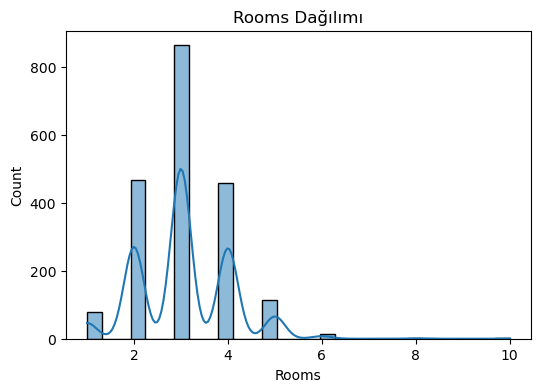

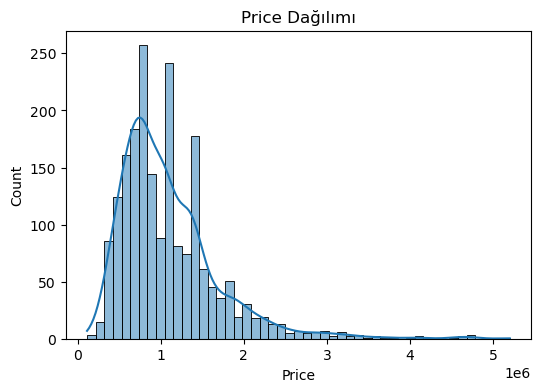

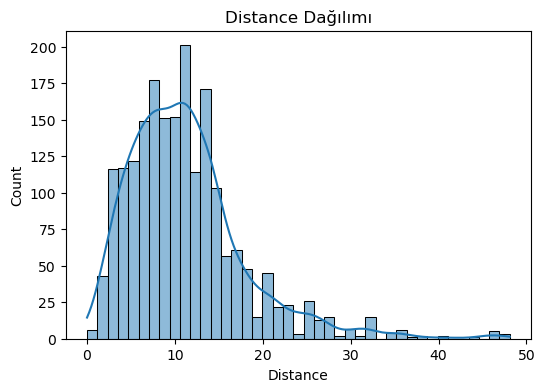

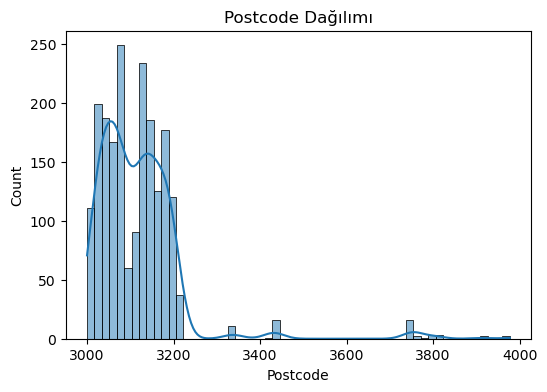

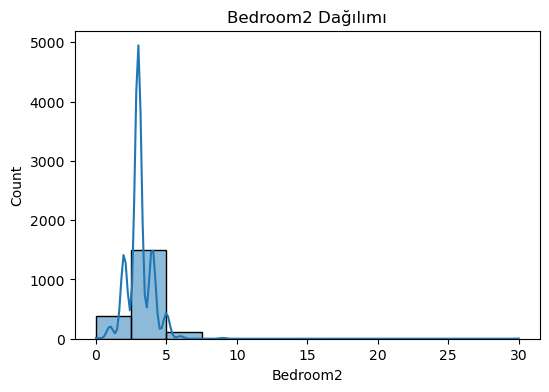

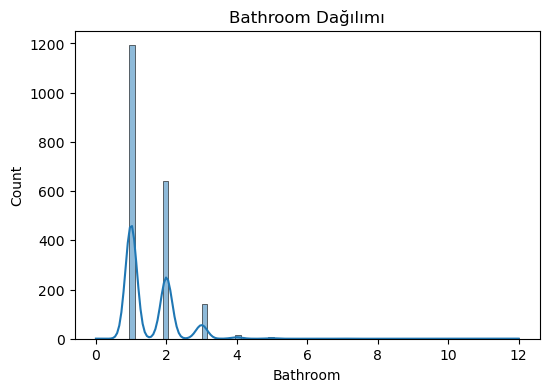

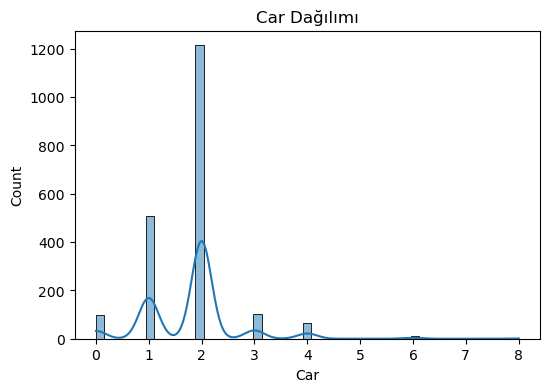

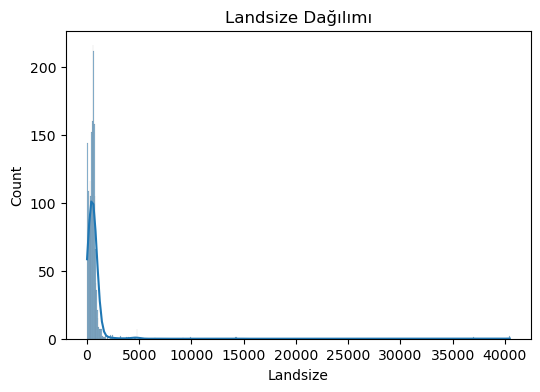

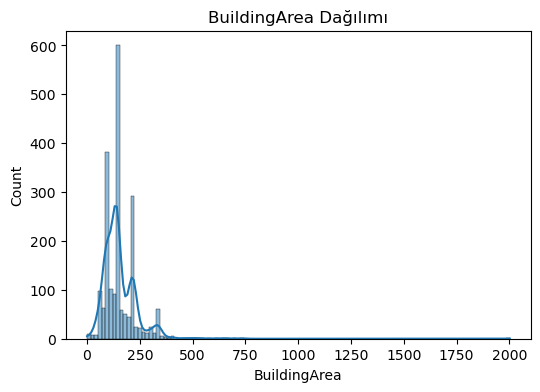

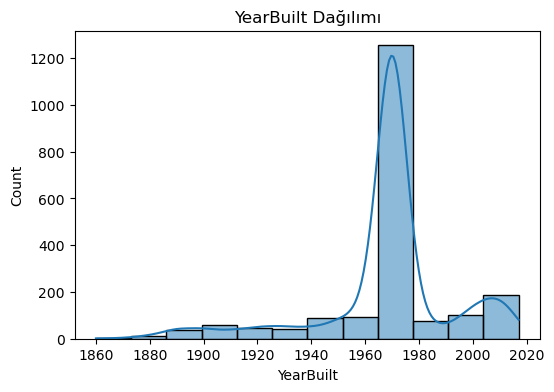

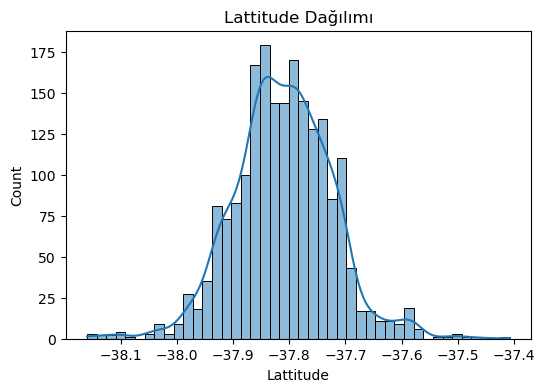

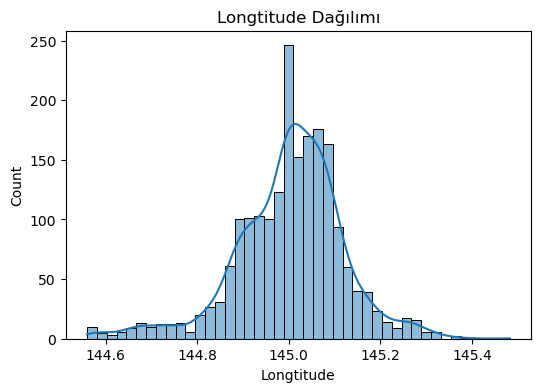

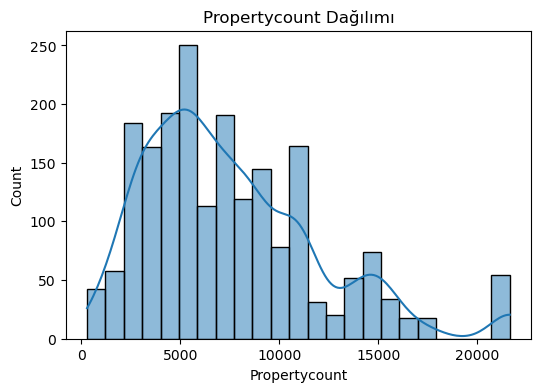

In [10]:
# numerik değerlerin dağılımları
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(sample_df[col], kde=True)
    plt.title(f"{col} Dağılımı")
    plt.show()

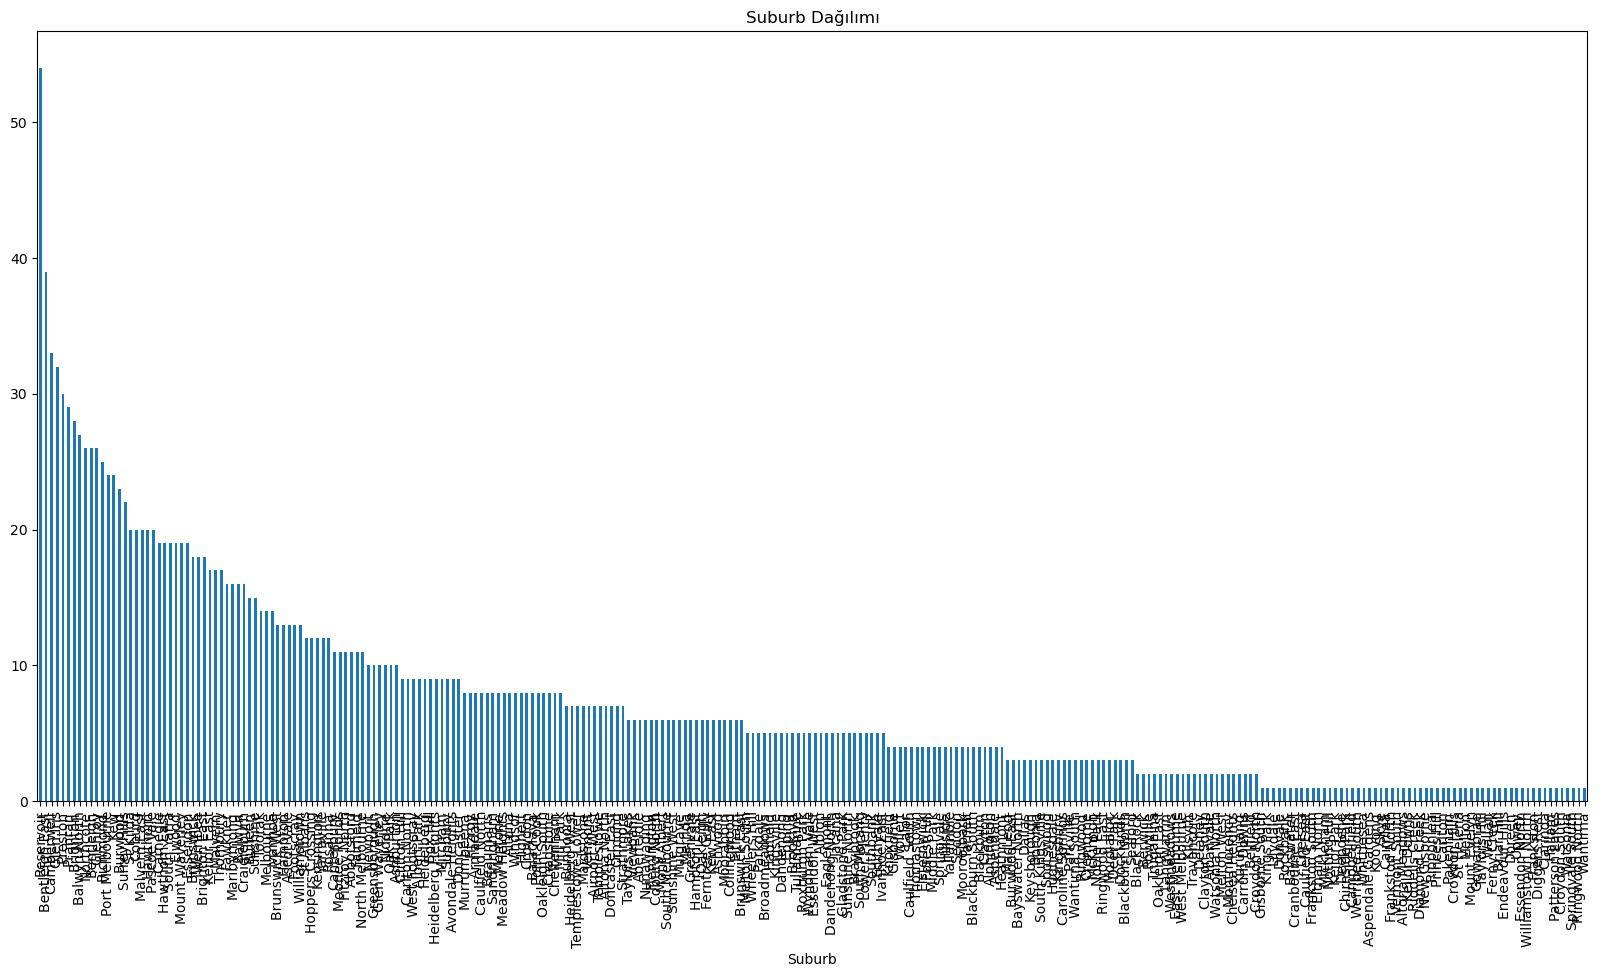

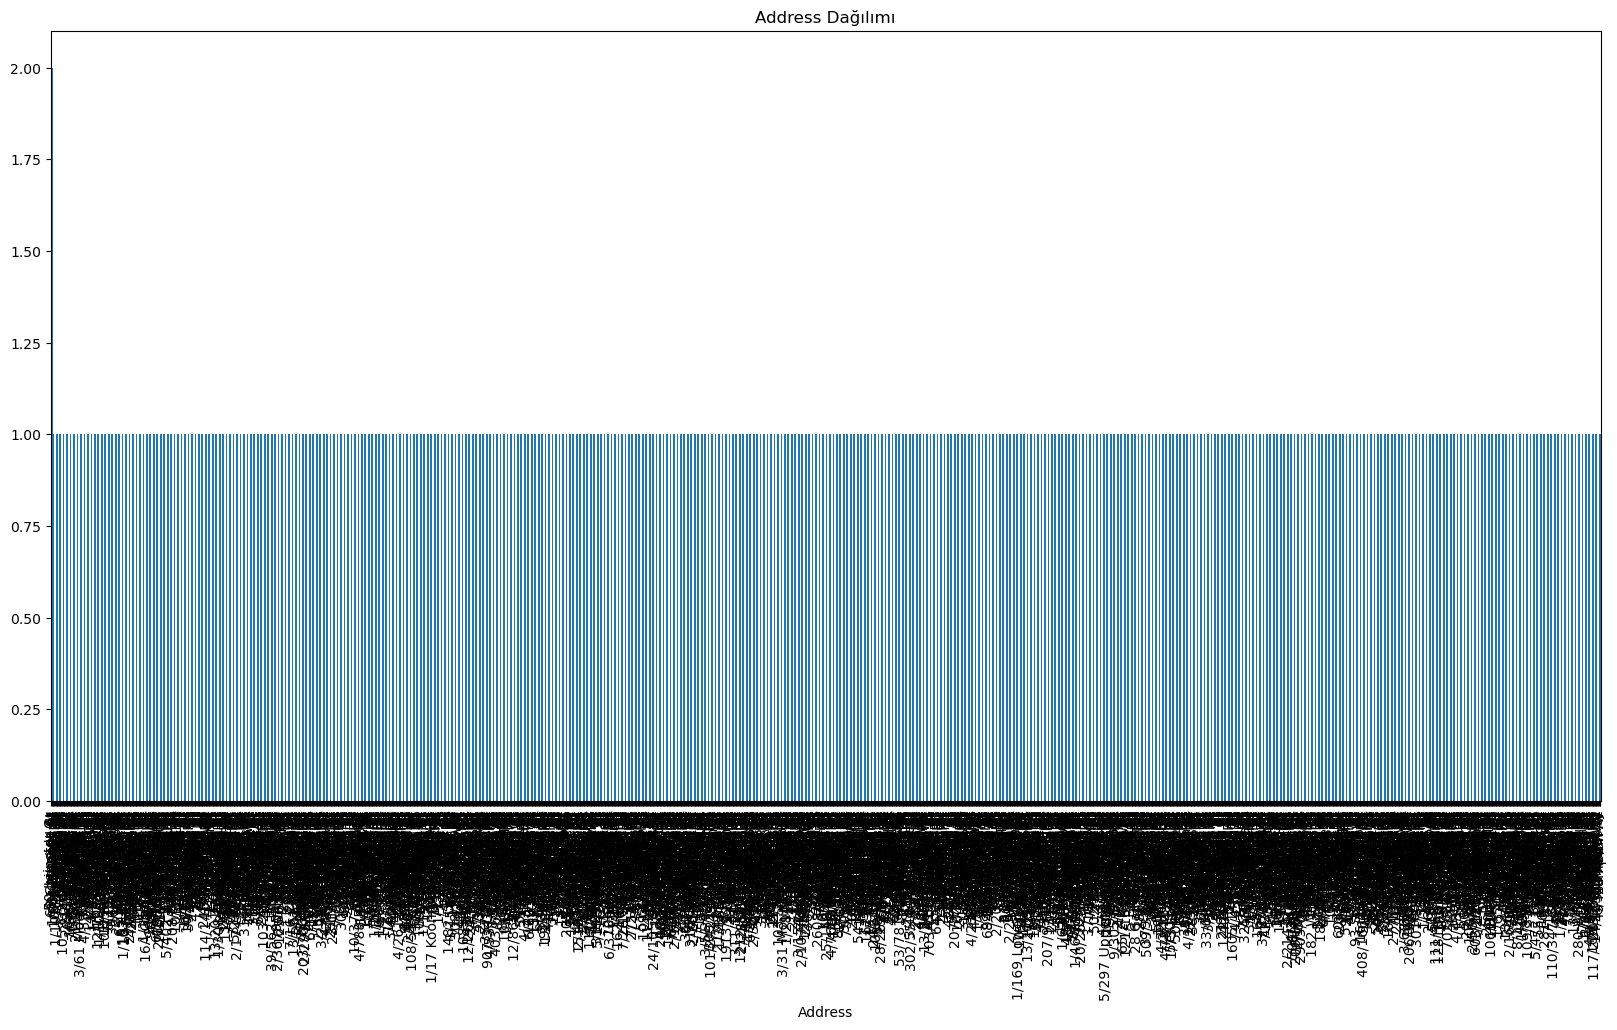

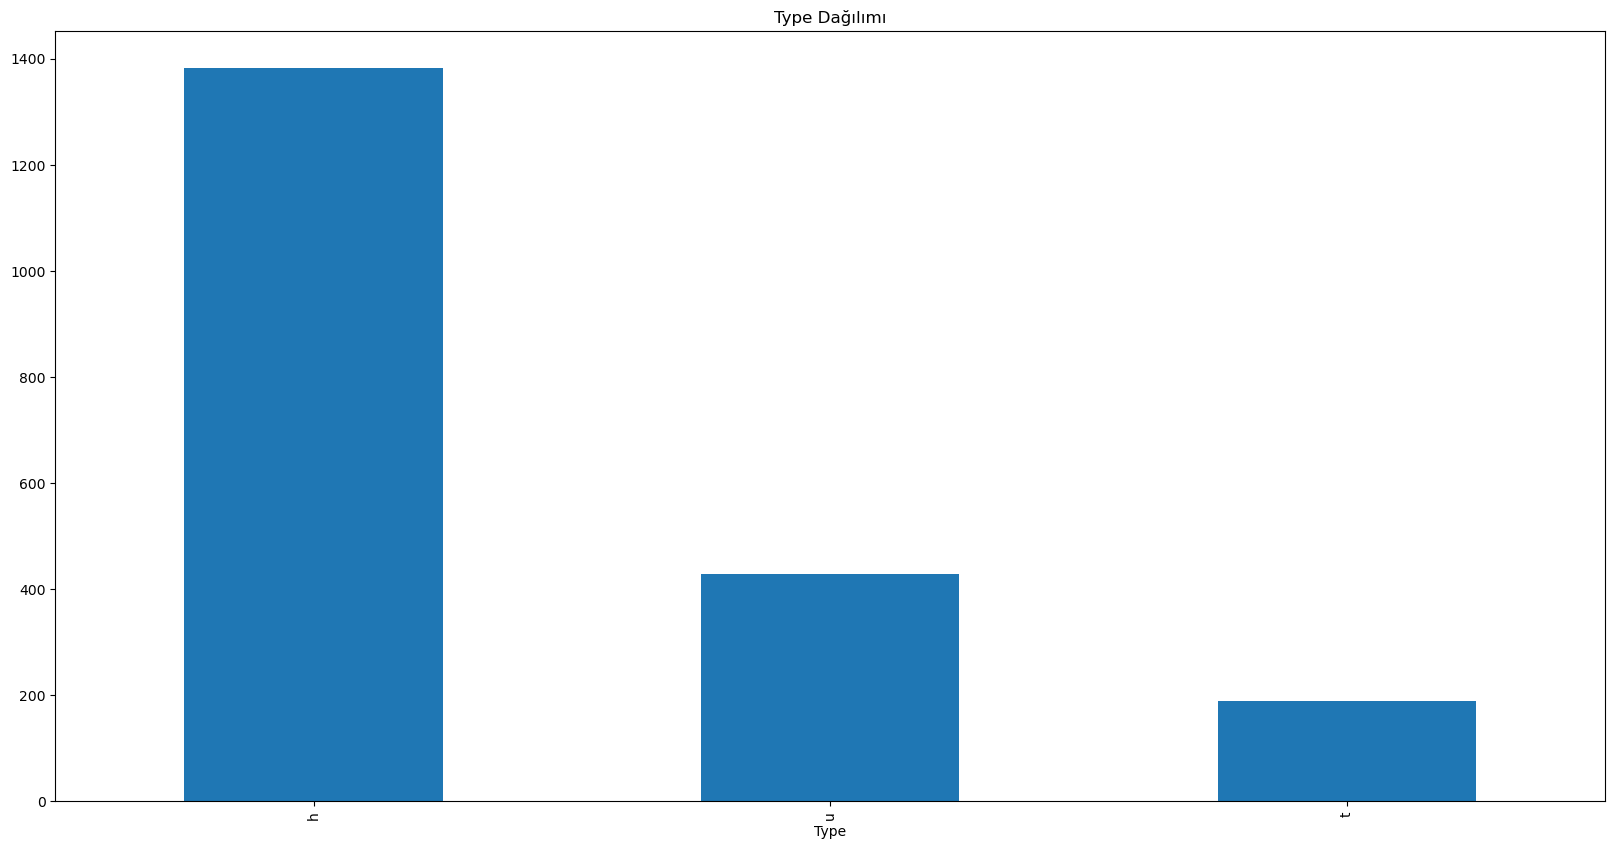

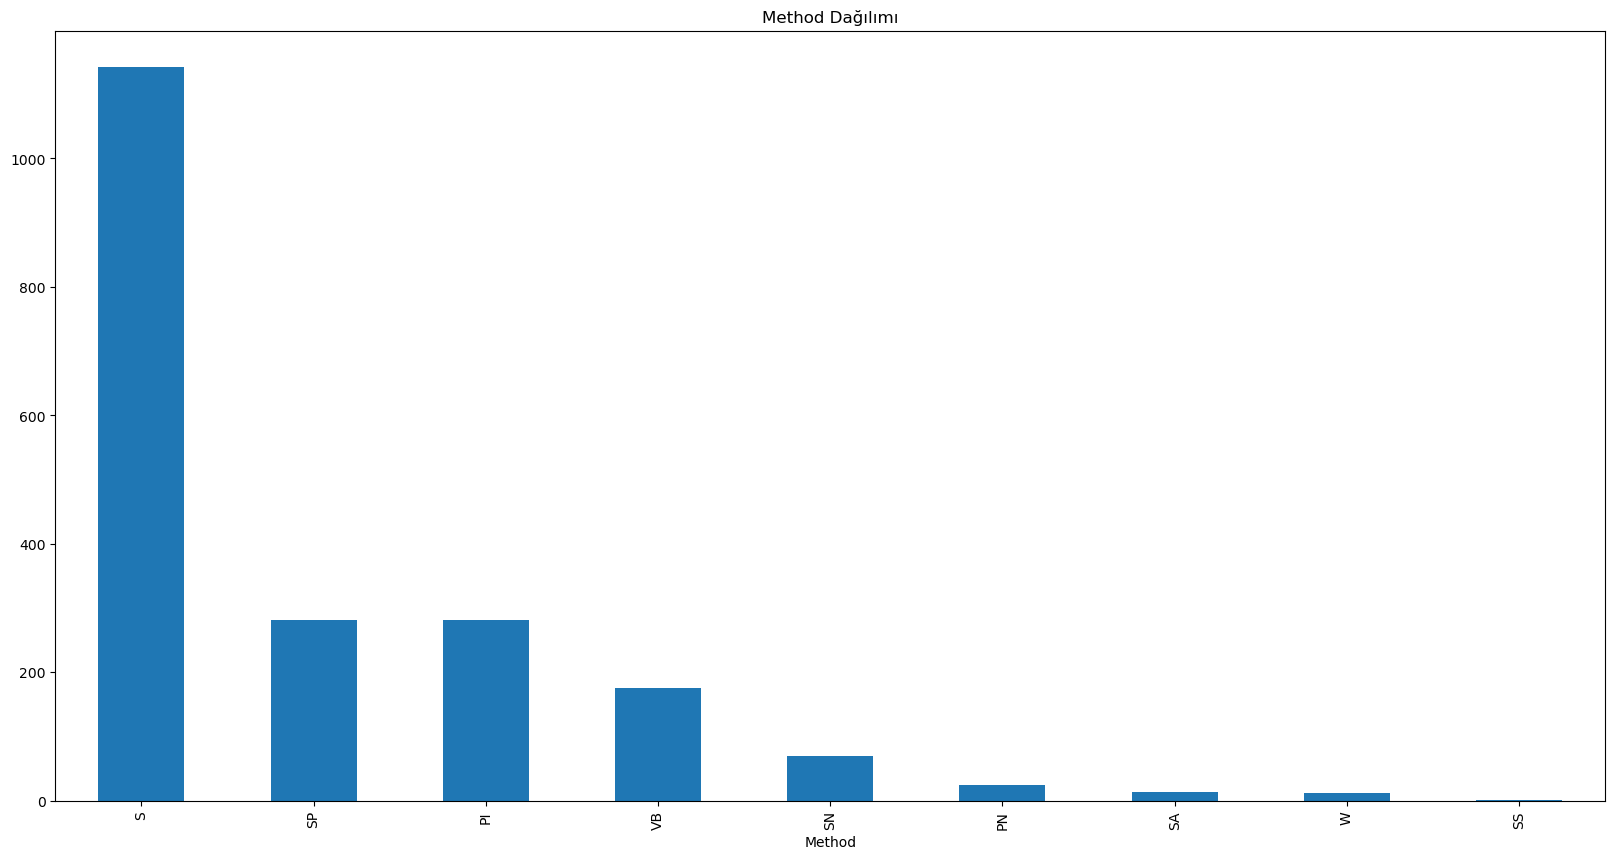

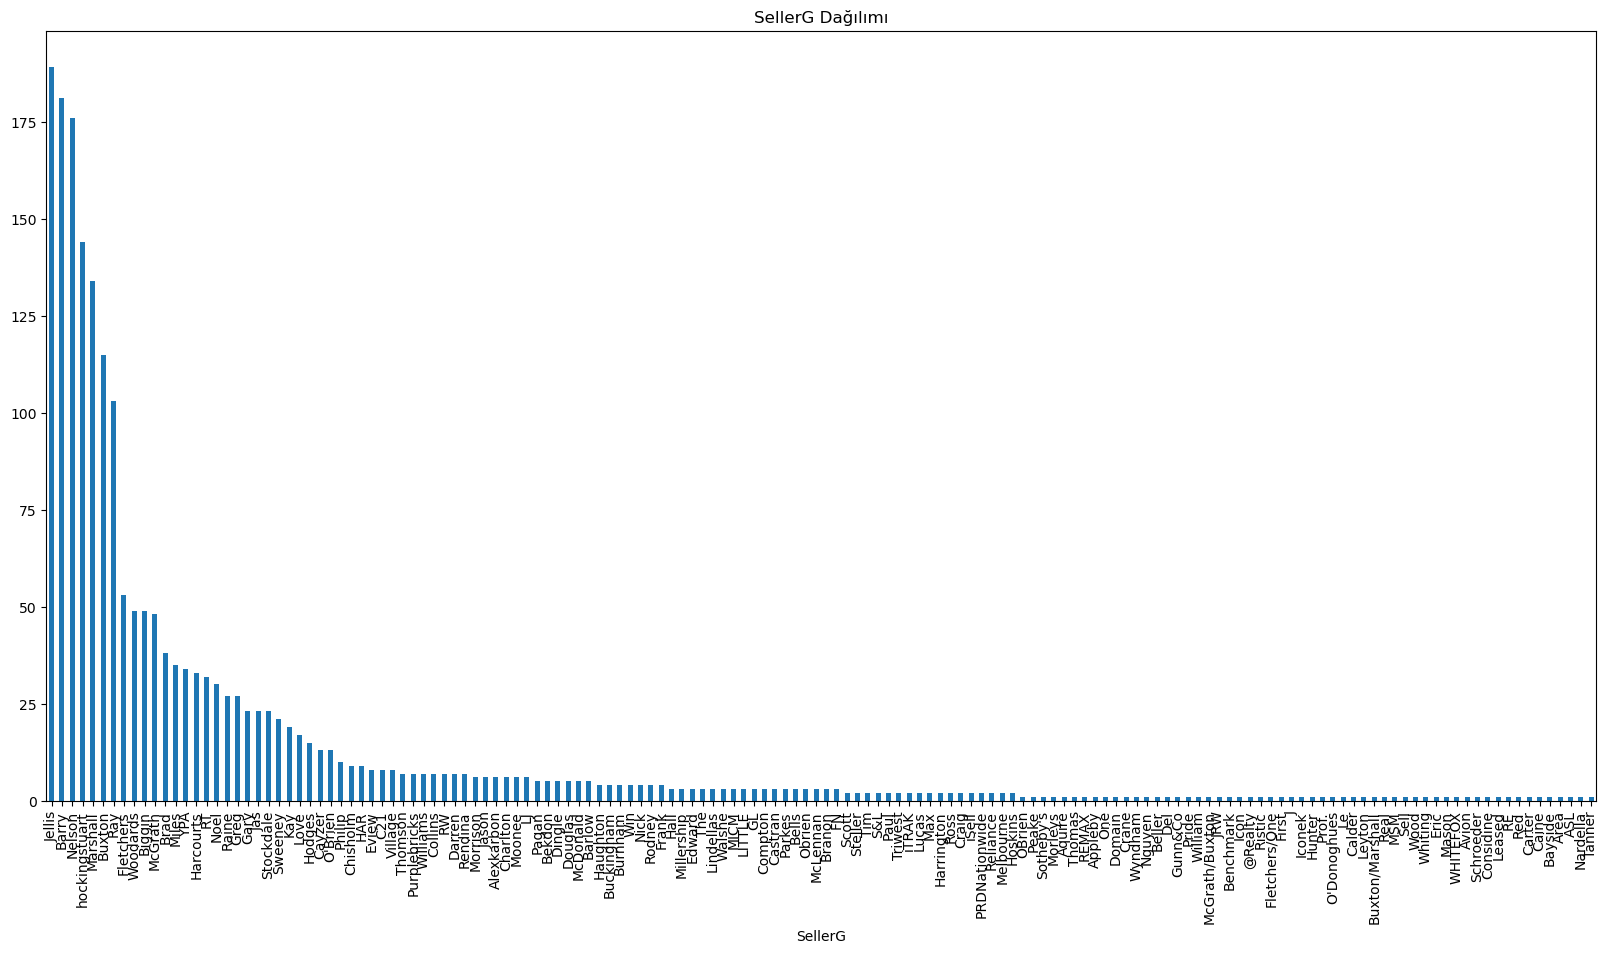

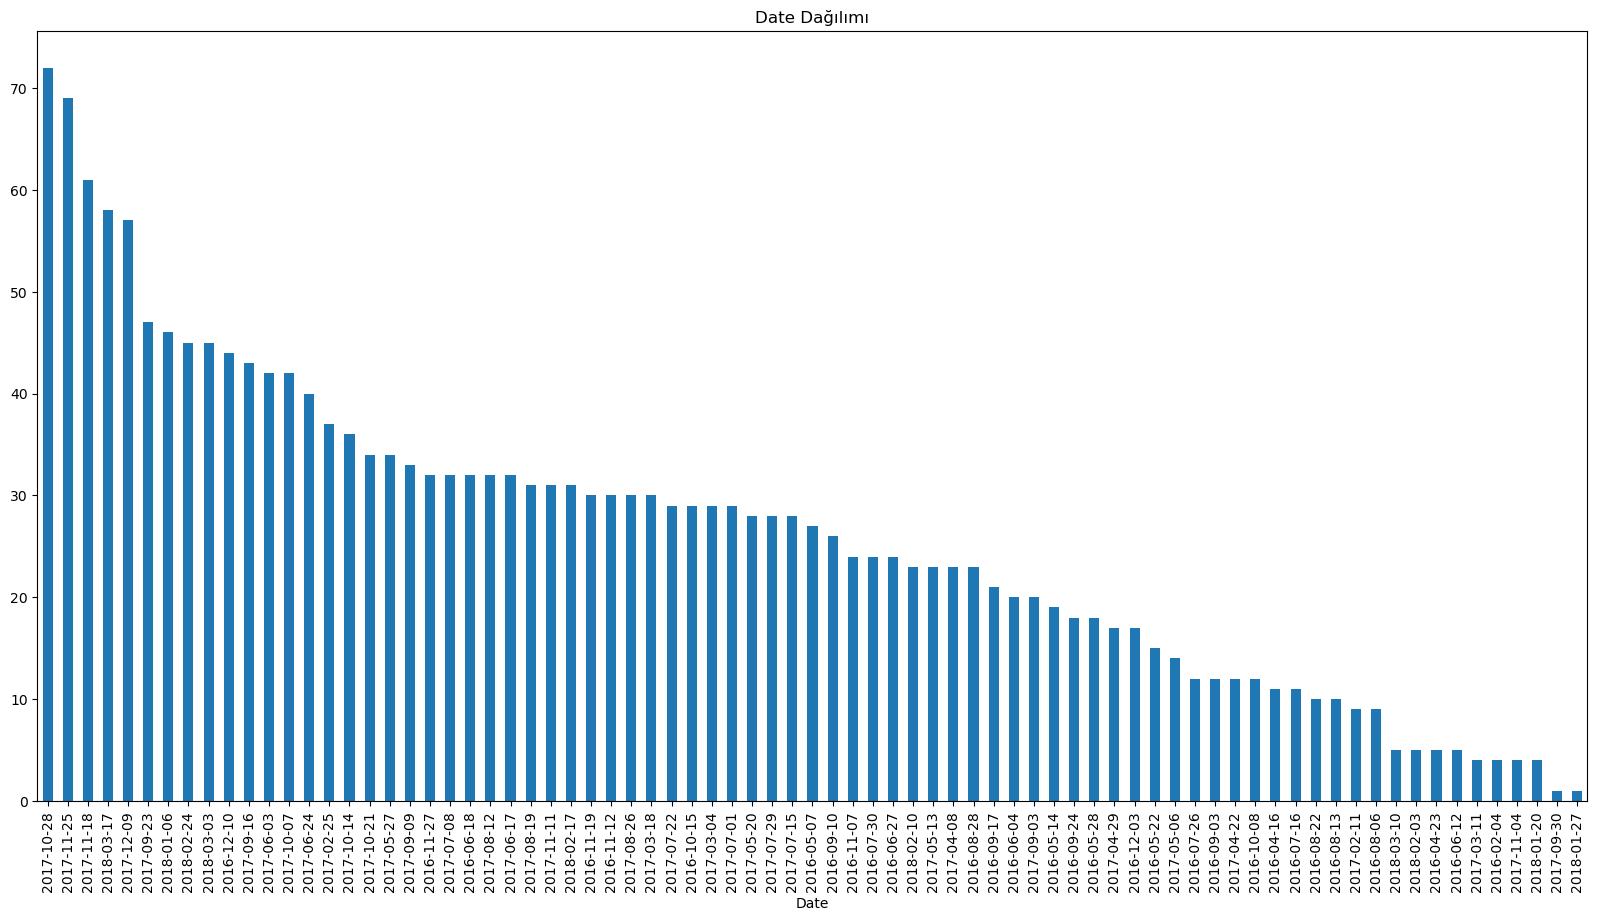

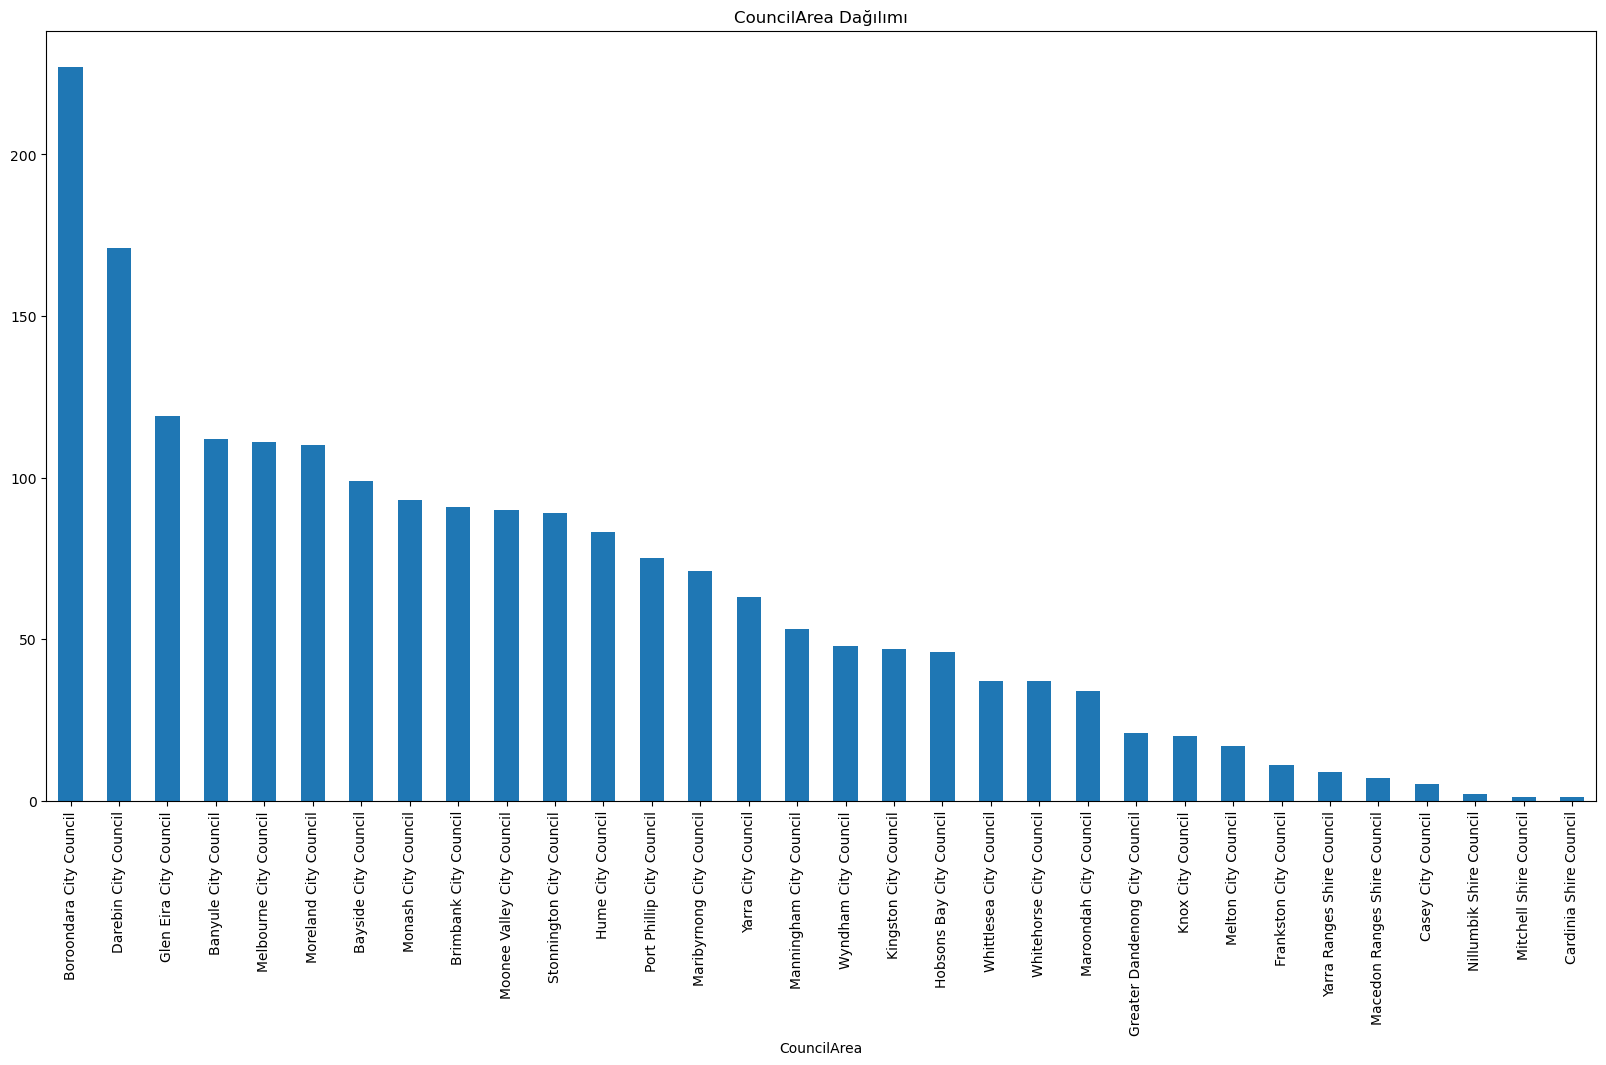

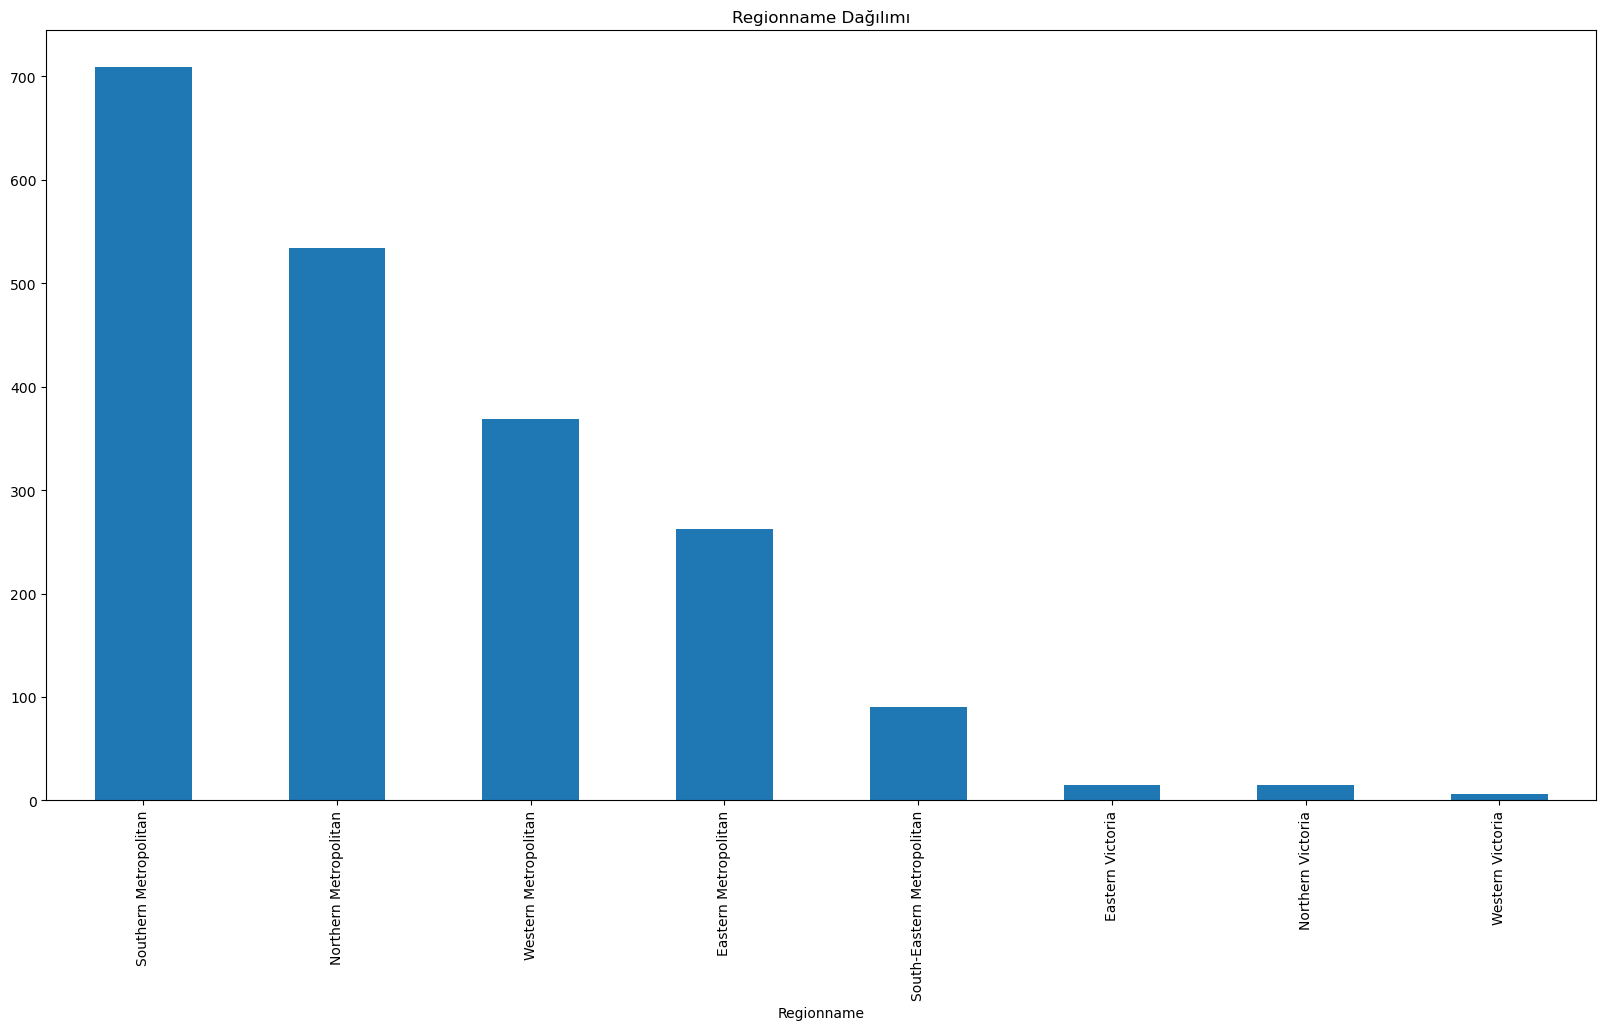

In [11]:
# kategorik değerlerin dağılımları
for col in categorical_cols:
    plt.figure(figsize=(20, 10))
    sample_df[col].value_counts().plot(kind='bar')
    plt.title(f"{col} Dağılımı")
    plt.show()

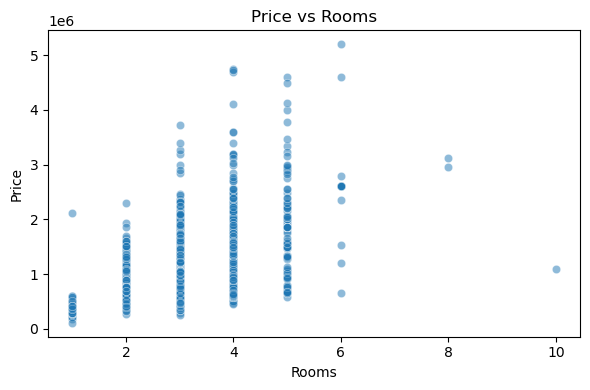

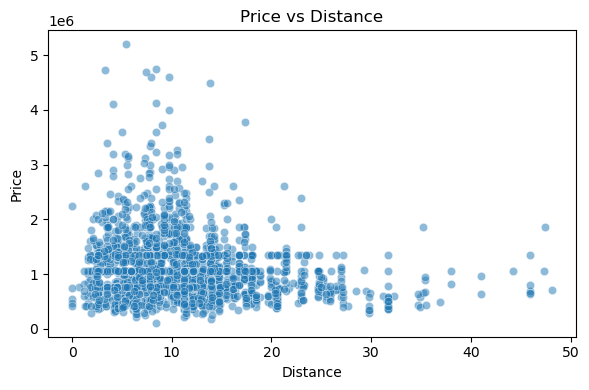

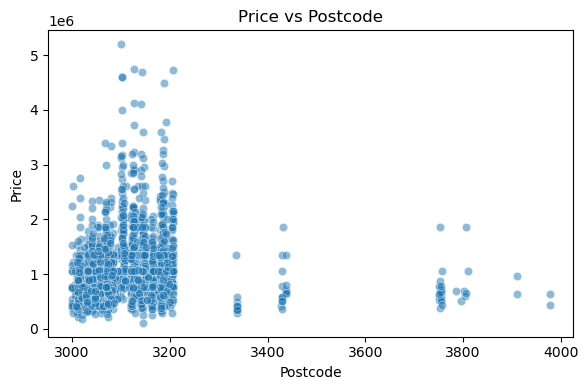

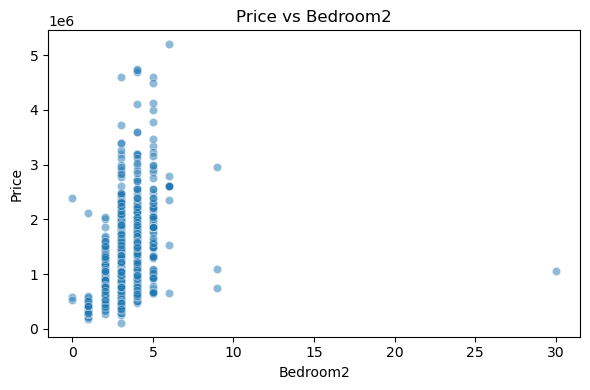

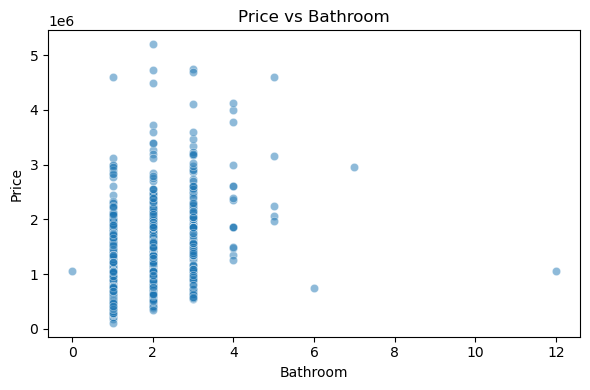

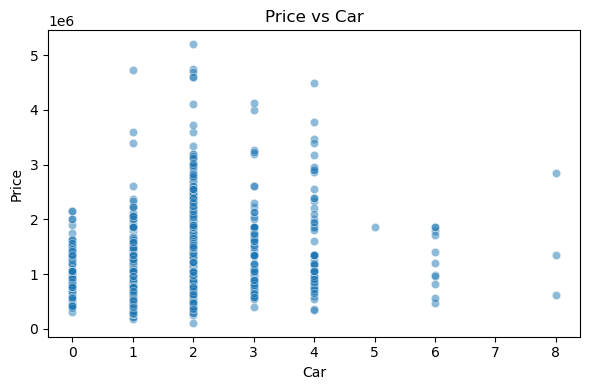

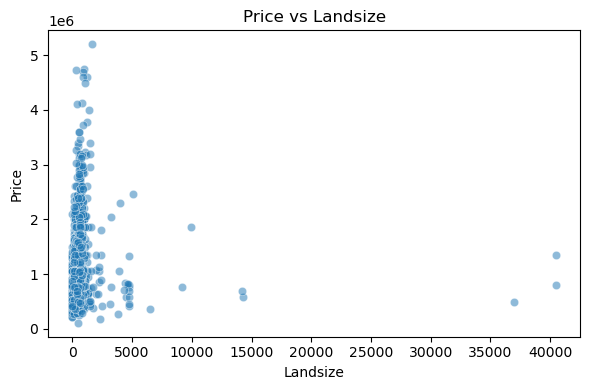

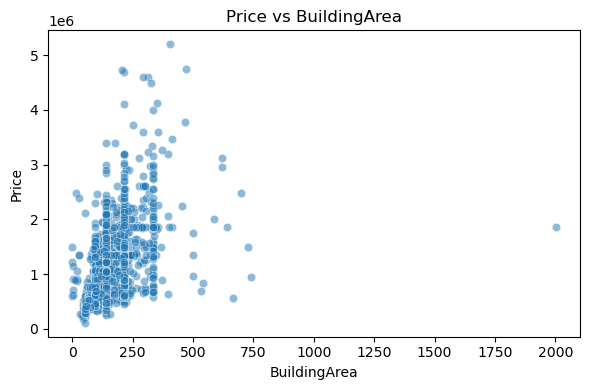

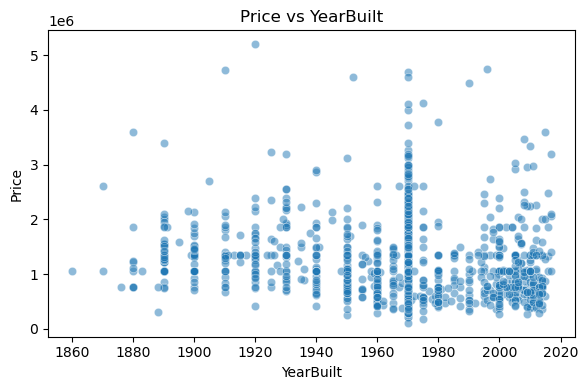

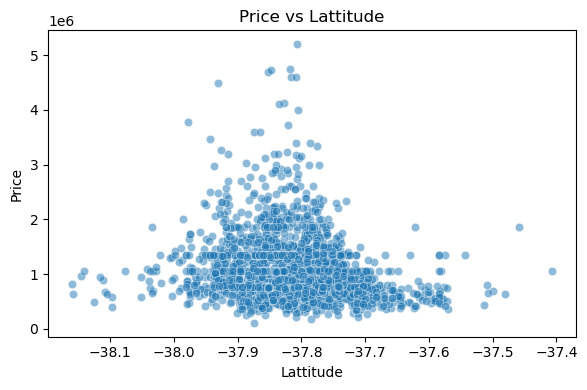

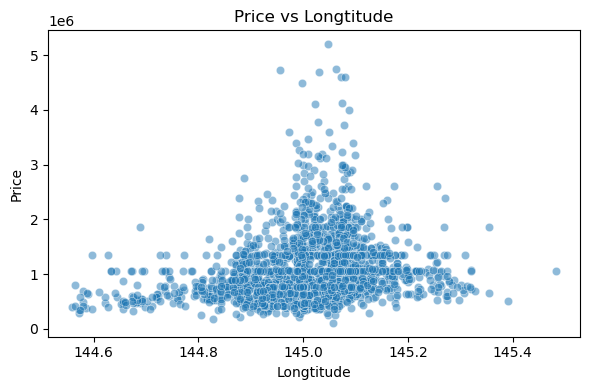

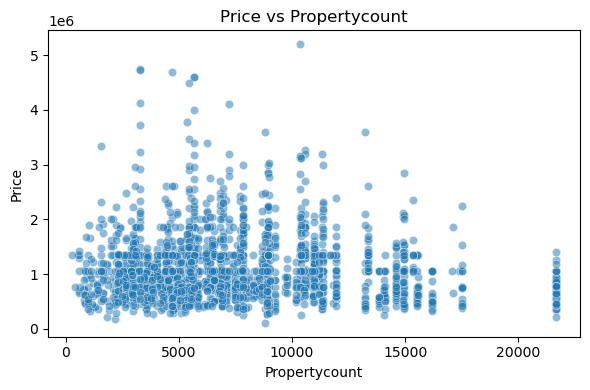

In [12]:
# price ile numerik değerlerin karşılaştırması
for col in numeric_cols:
    if col != 'Price':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=sample_df, x=col, y='Price', alpha=0.5)
        plt.title(f'Price vs {col}')
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.tight_layout()
        plt.show()

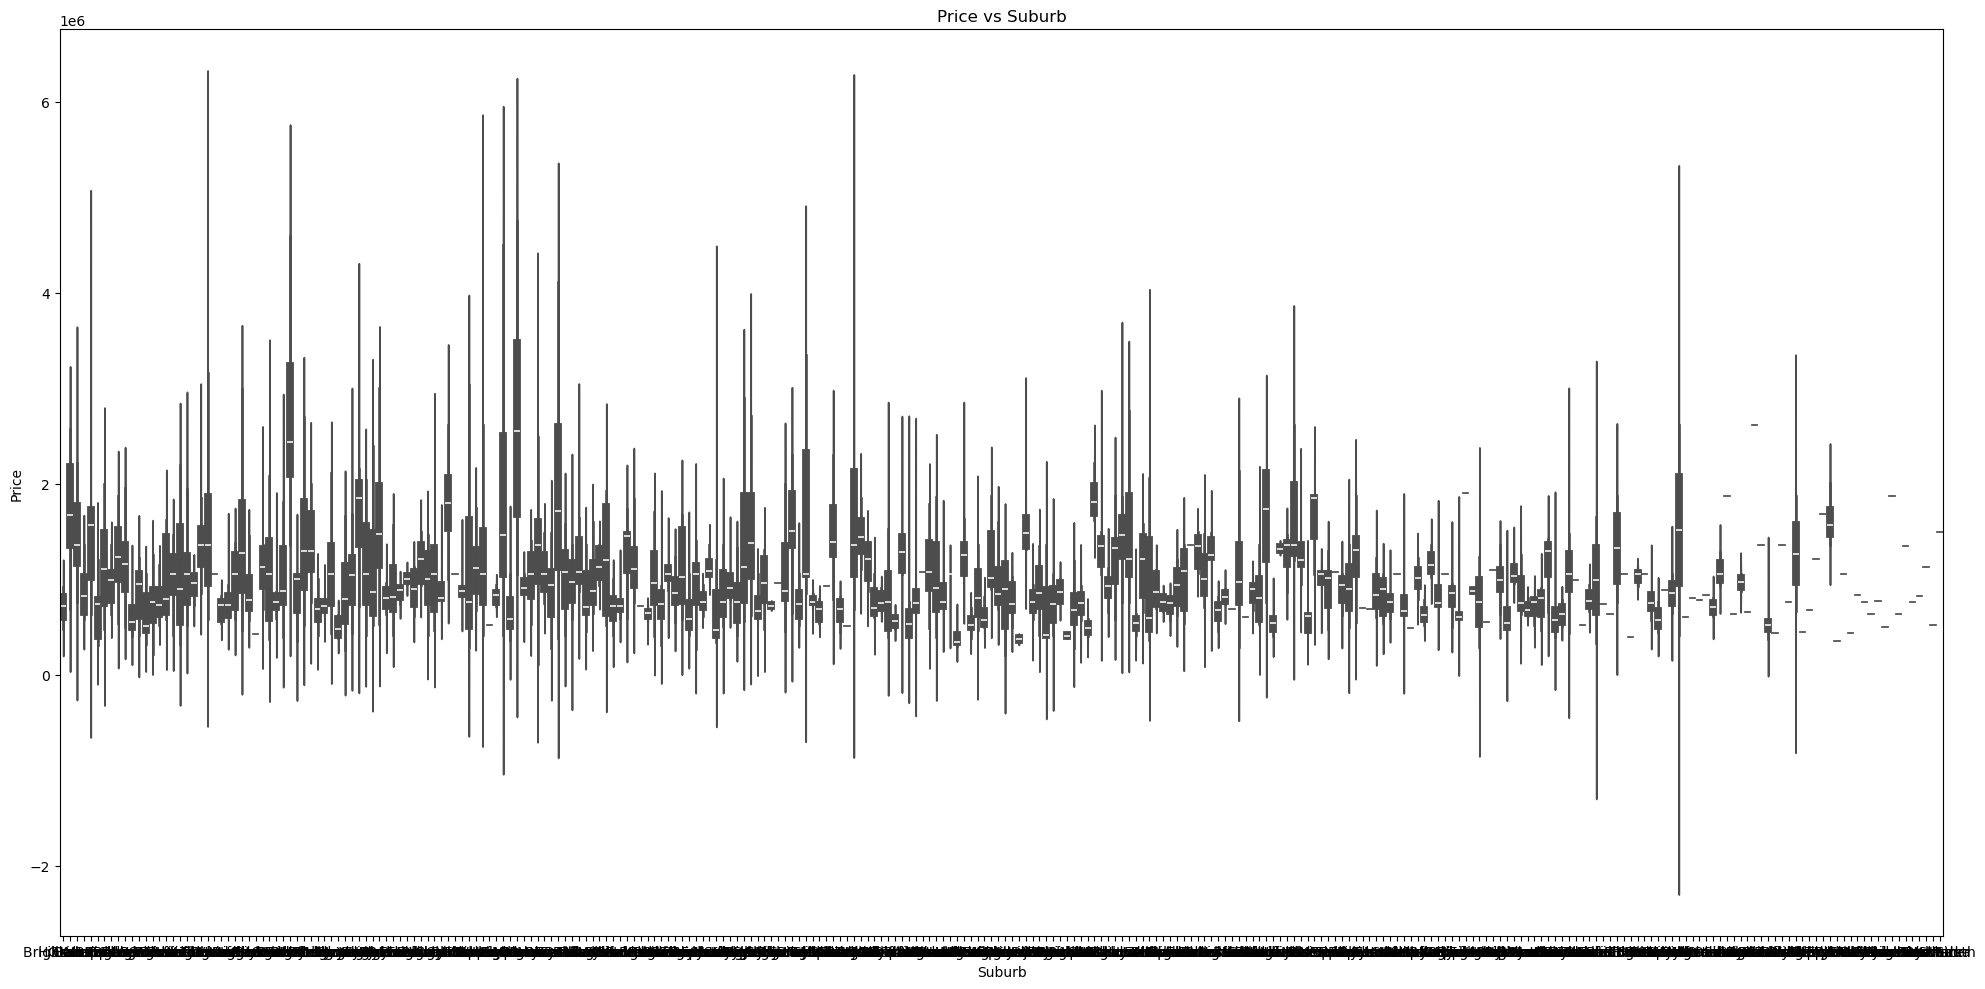

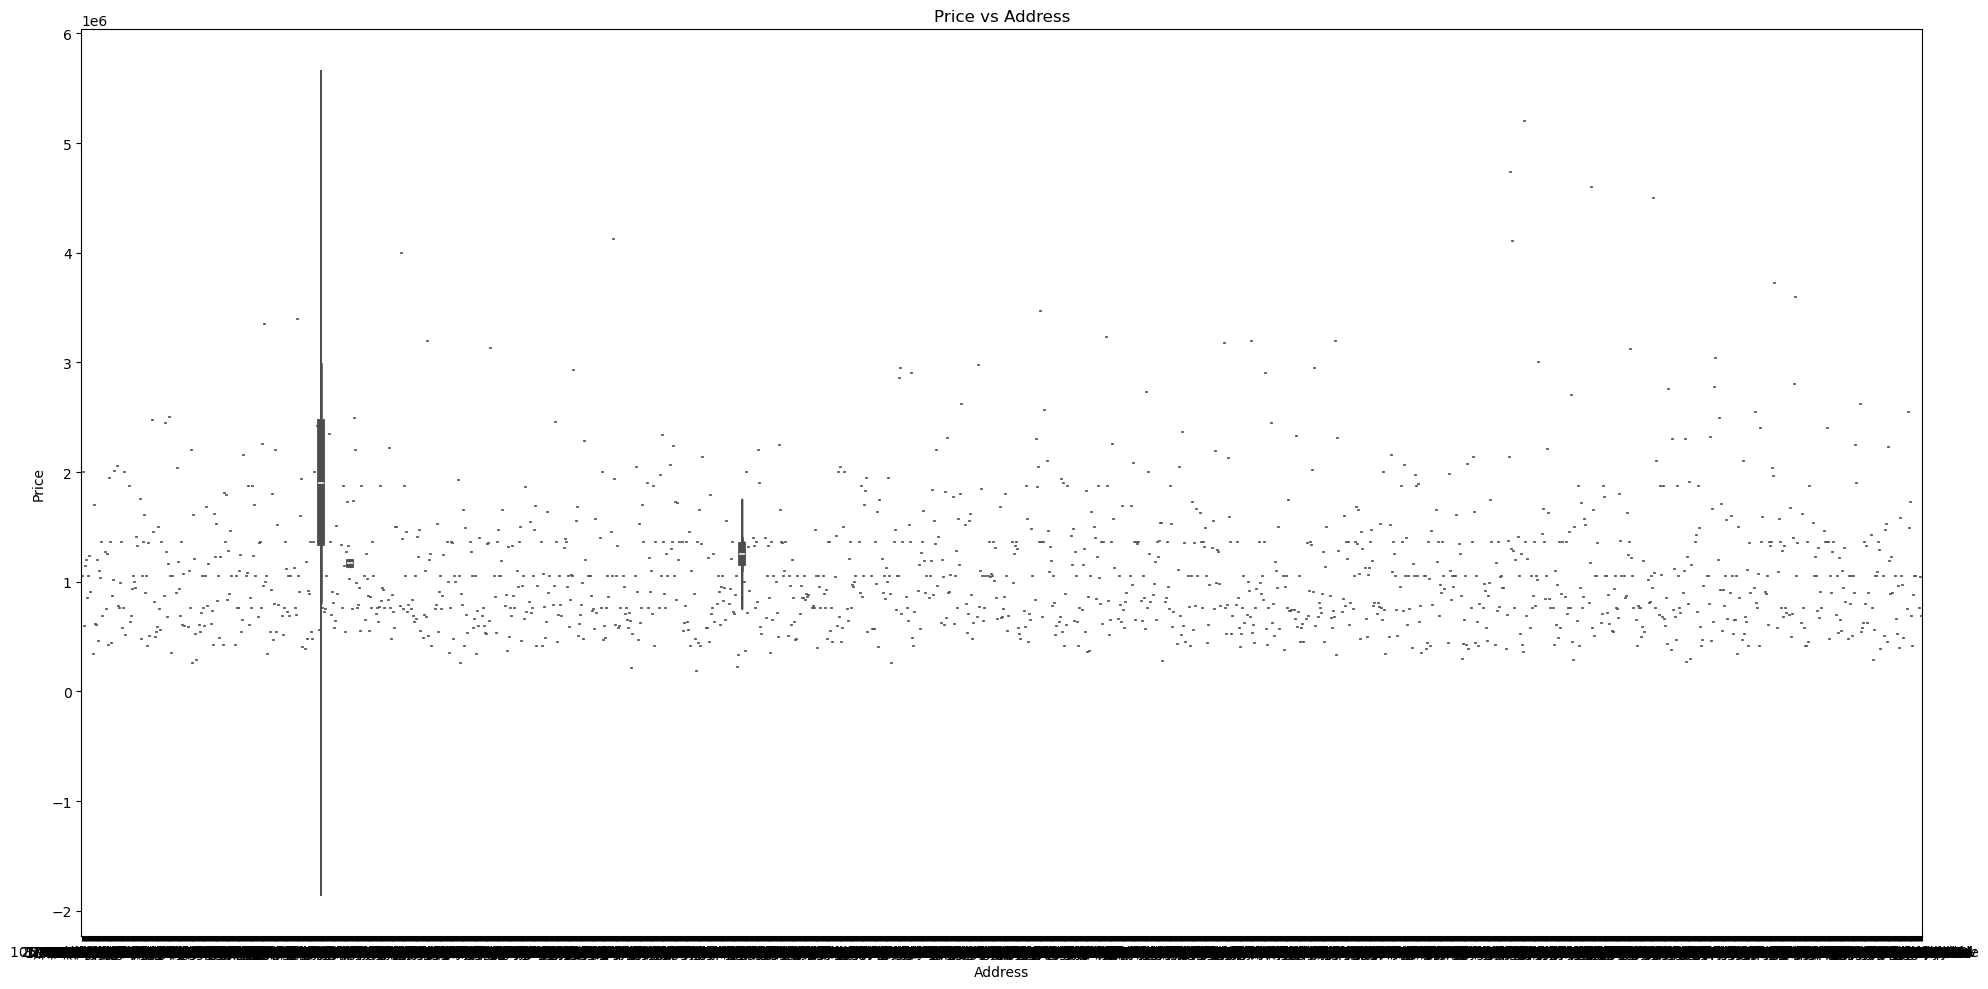

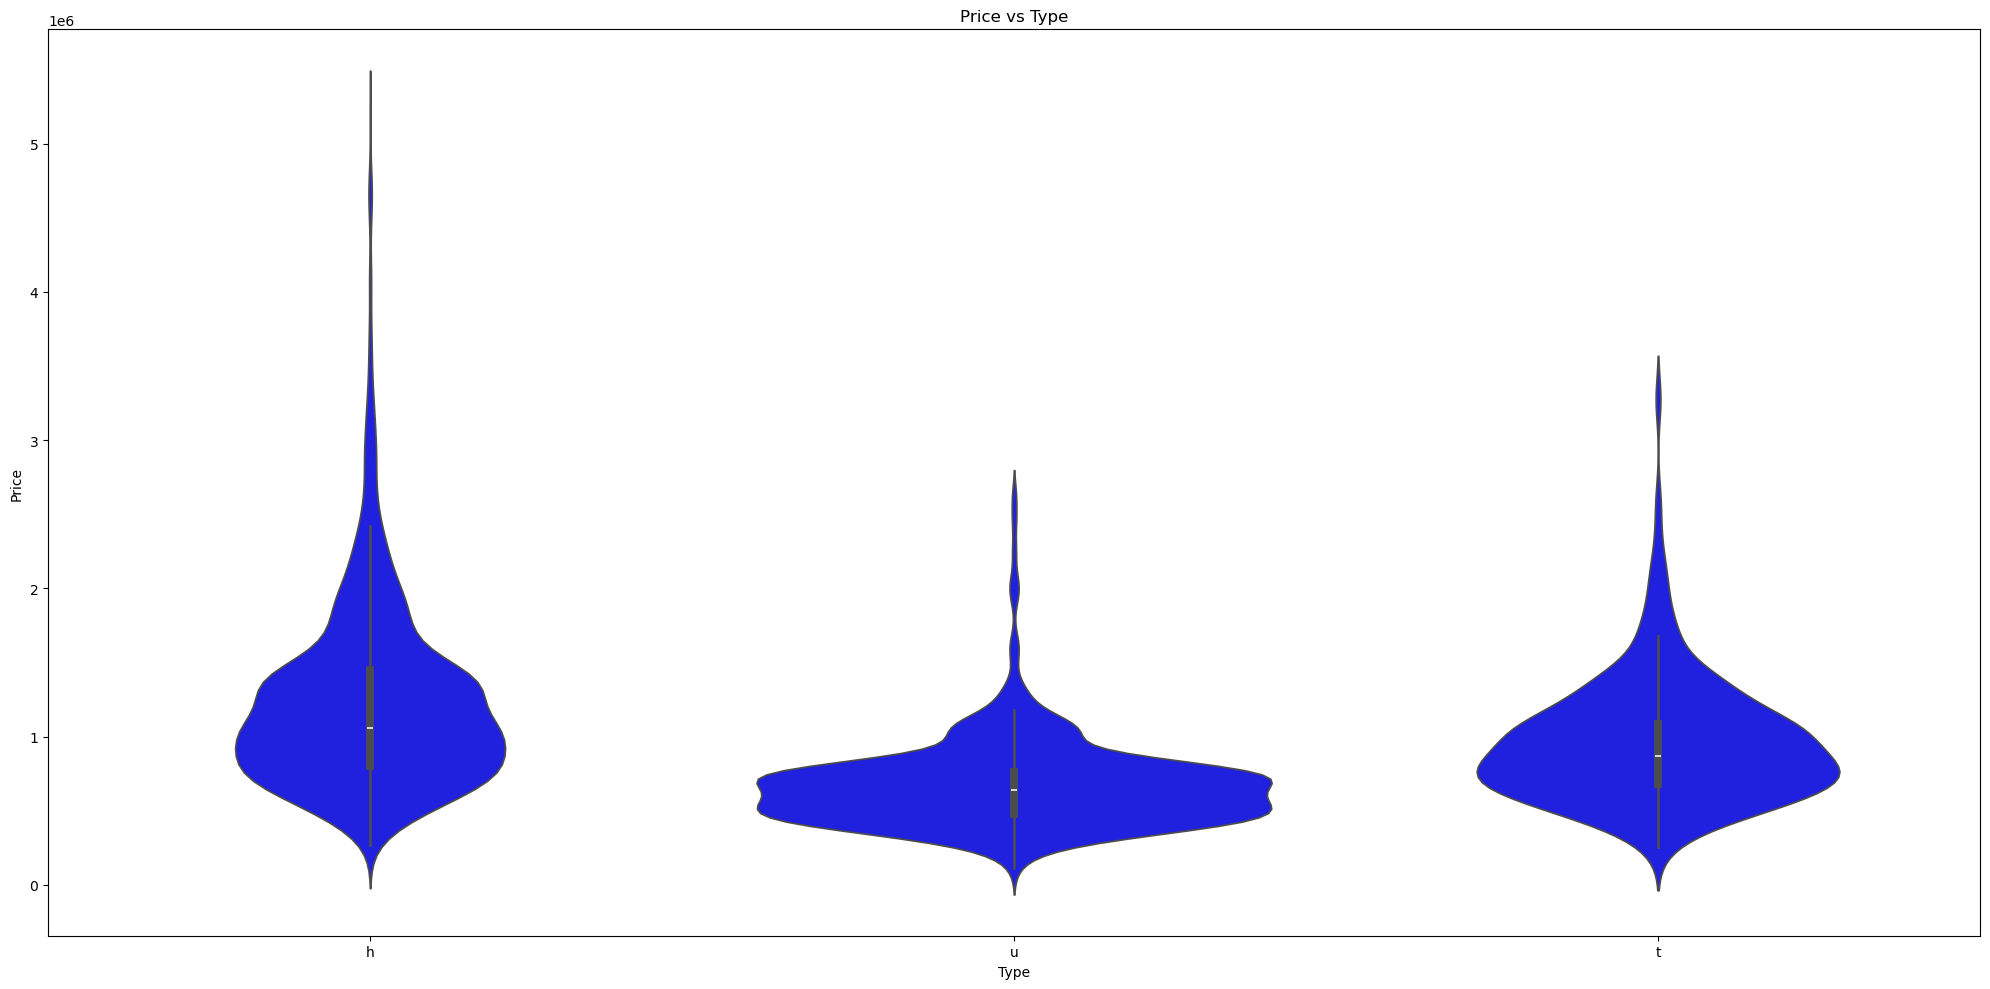

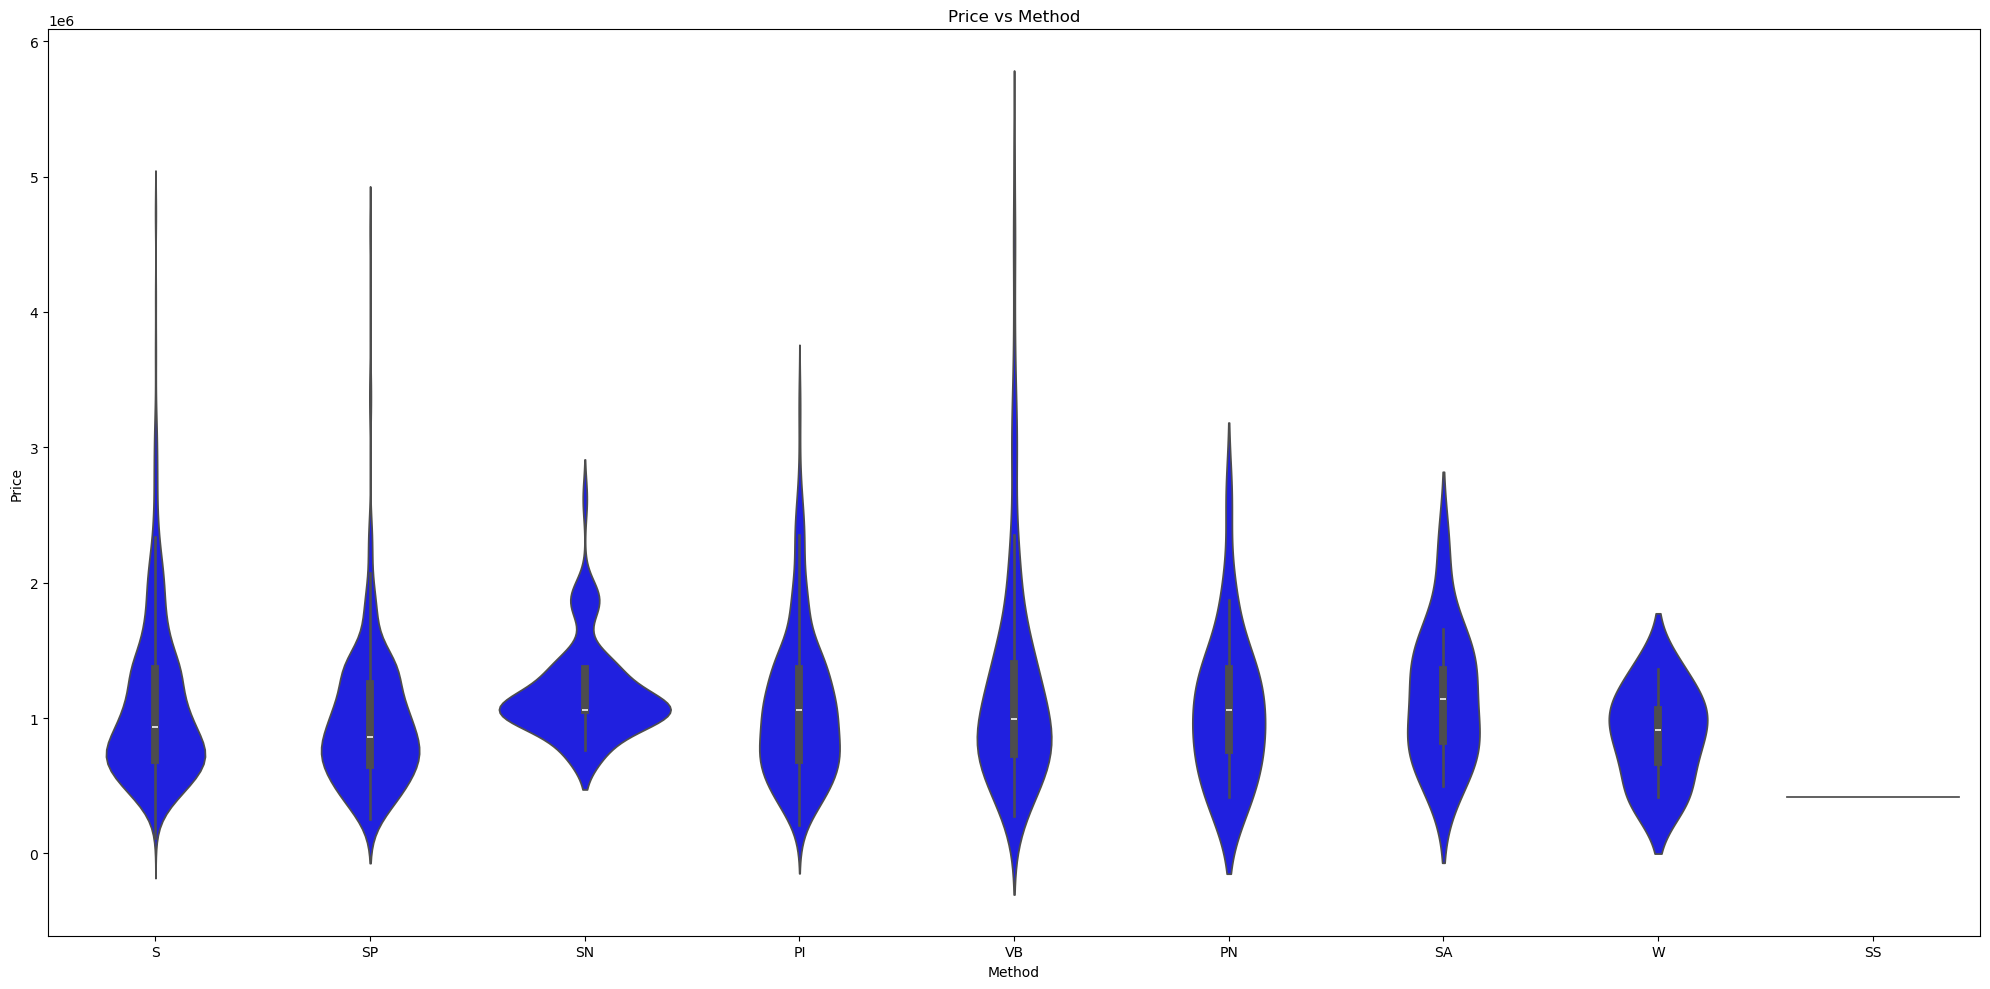

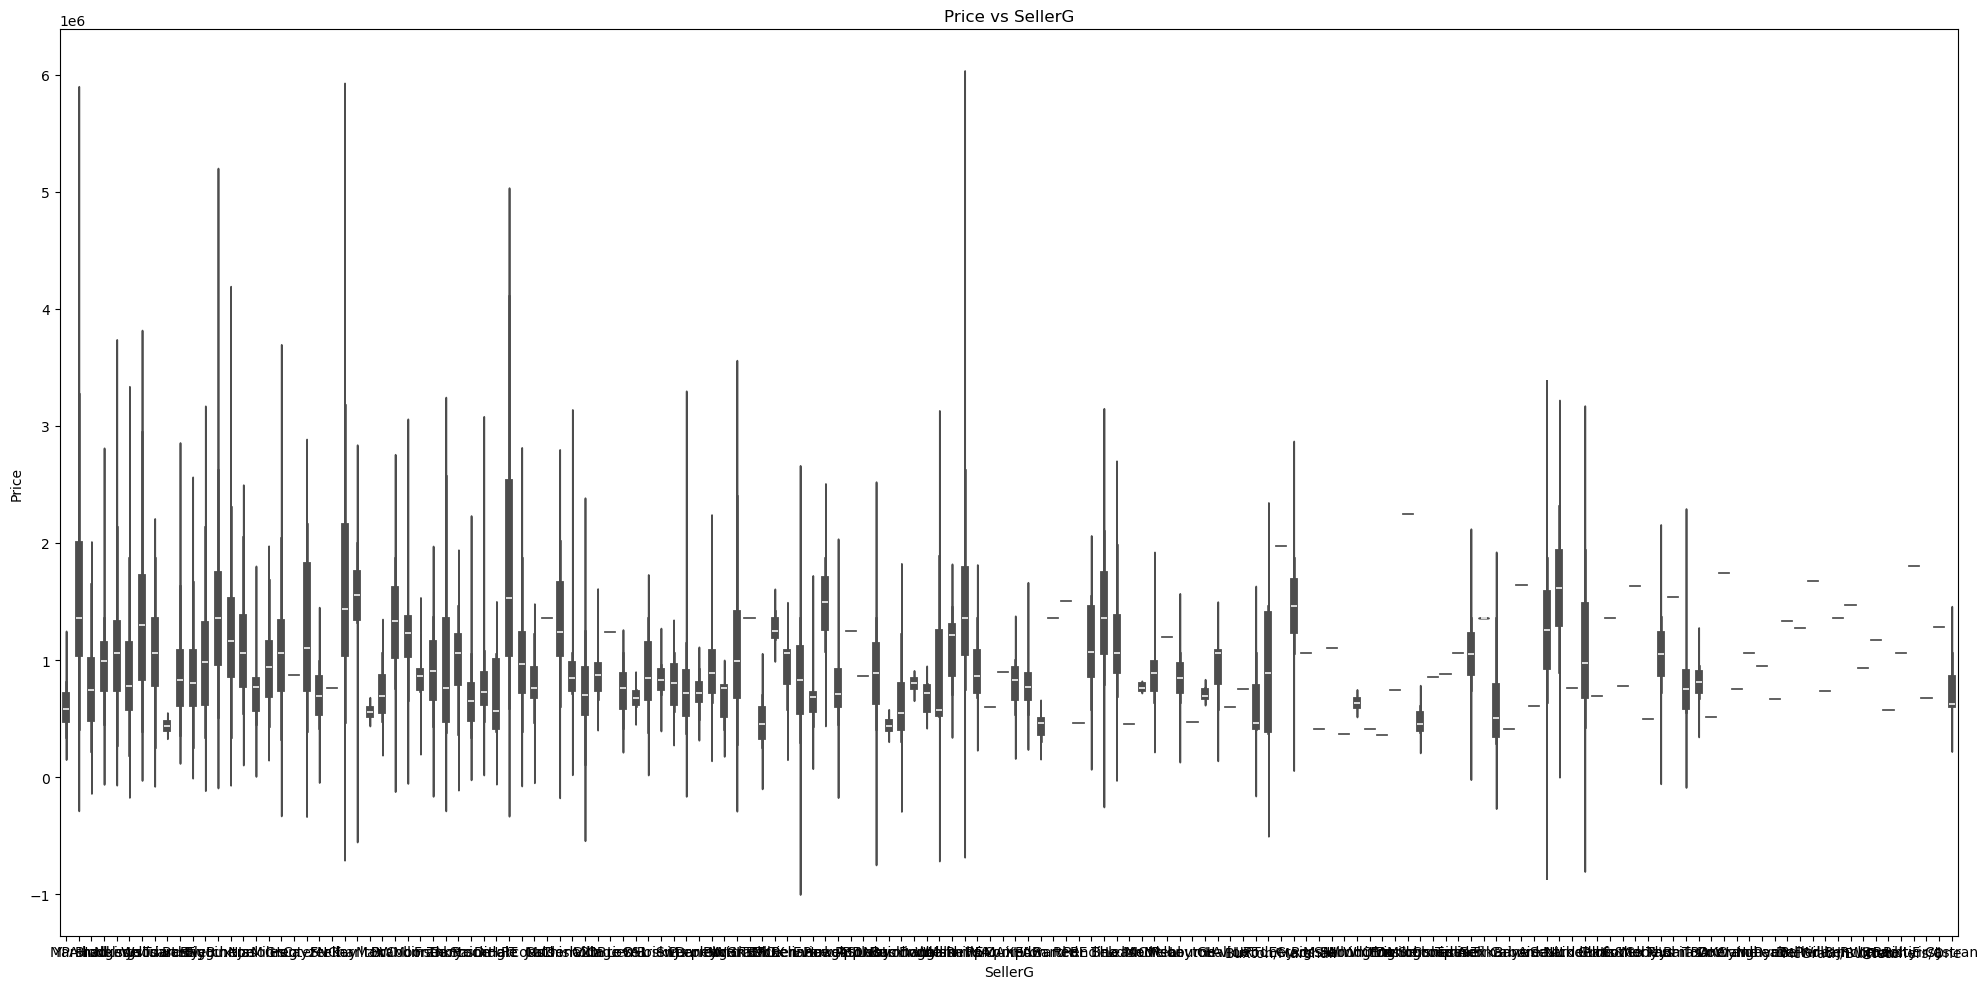

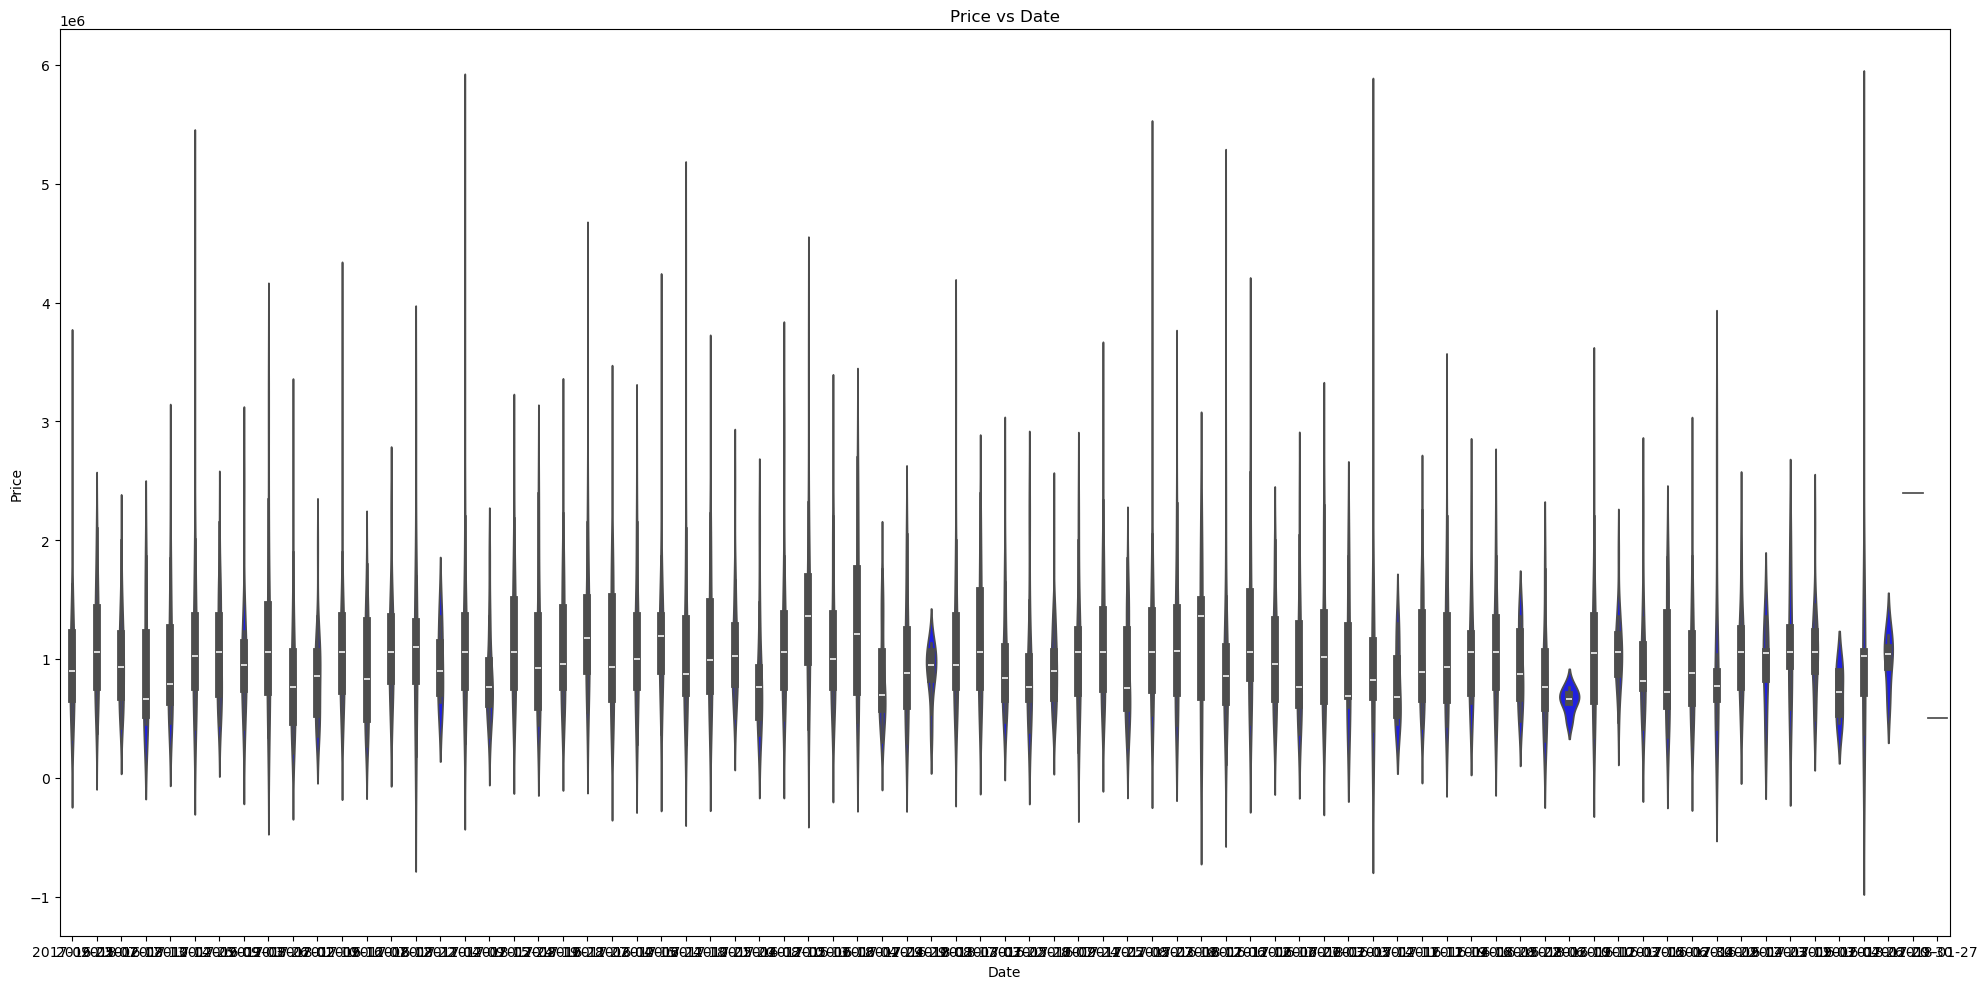

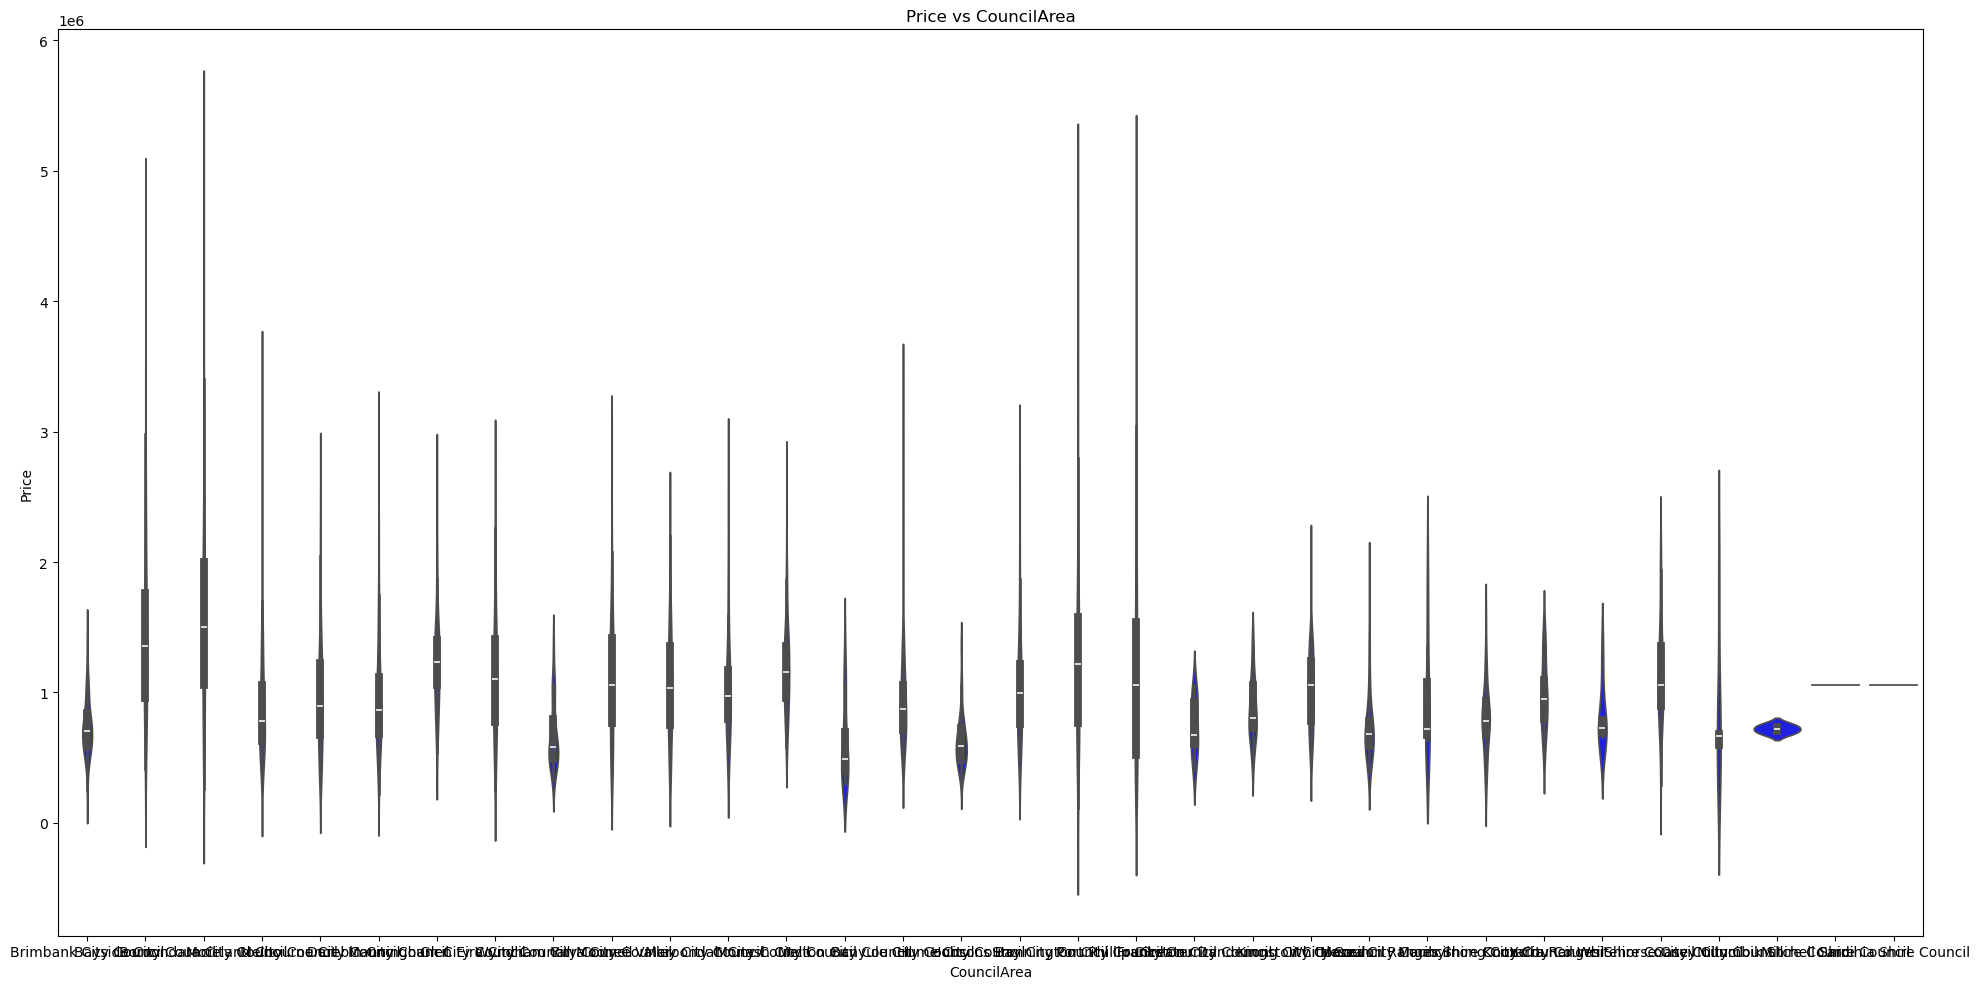

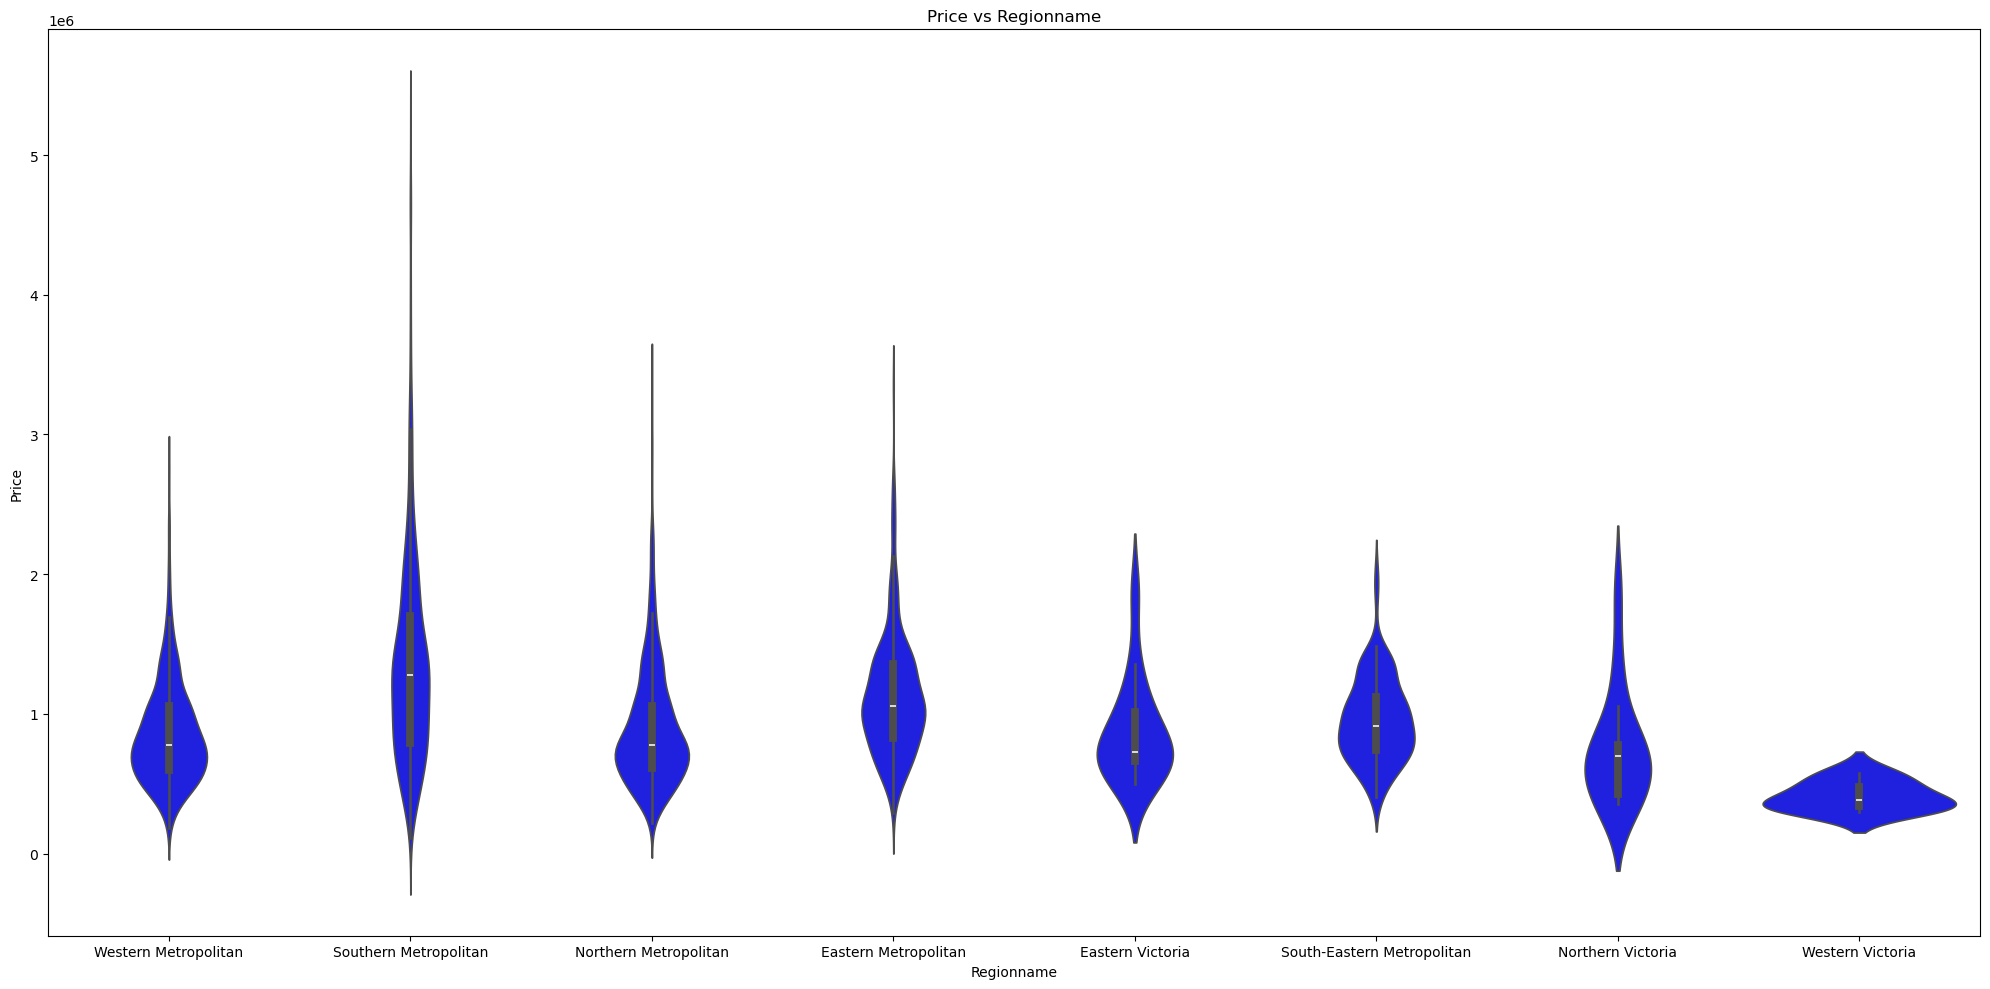

In [13]:
# price ile kategorik değerlerin karşılaştırması
for col in categorical_cols:
    plt.figure(figsize=(20, 10))
    sns.violinplot(data=sample_df, x=col, y='Price', color='Blue')
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()

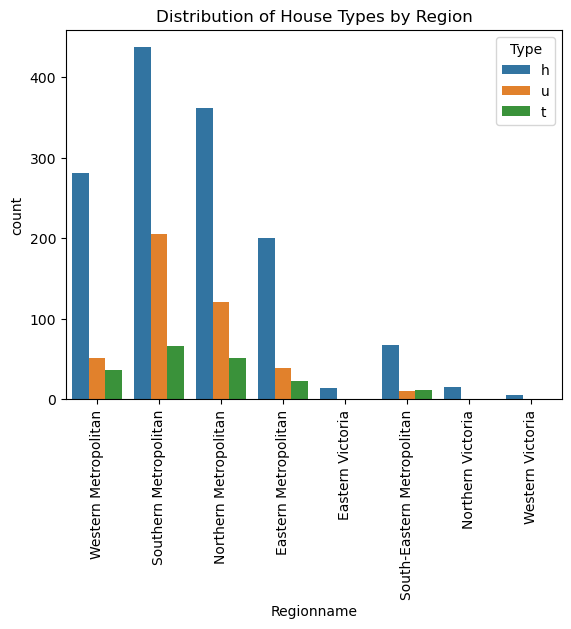

In [14]:
# Bölgelere Göre Ev Tipi Dağılımı
sns.countplot(x='Regionname', hue='Type', data=sample_df)
plt.xticks(rotation=90)
plt.title('Distribution of House Types by Region')
plt.show()

In [15]:
# hangi bölgede hangi tip evler daha çok hangi yöntemle satılmış
pd.crosstab(index=sample_df['Type'], columns=sample_df['Method'])
pd.crosstab(index=[sample_df['Regionname'], sample_df['Type']], columns=sample_df['Method'])

Method                           PI  PN    S  SA  SN  SP  SS  VB  W
Regionname                 Type                                    
Eastern Metropolitan       h     29   1  115   0  14  26   0  15  0
                           t      3   2    7   0   1   6   0   4  0
                           u      4   0   27   0   1   5   0   2  0
Eastern Victoria           h      2   0    8   0   2   0   0   2  0
                           u      0   0    1   0   0   0   0   0  0
Northern Metropolitan      h     46   2  245   2   6  42   0  17  2
                           t      7   0   25   0   1  12   0   6  0
                           u     28   2   49   1   1  26   1  10  3
Northern Victoria          h      0   0    8   1   1   4   0   1  0
South-Eastern Metropolitan h     12   0   32   1   5   9   0   9  0
                           t      3   0    6   0   1   1   0   0  1
                           u      2   0    3   0   0   3   0   2  0
Southern Metropolitan      h     61   6  253   4  17  44   0  52  0
                           t     11   2   32   1   3  10   0   8  0
                           u     32   7  111   2   3  33   0  14  3
Western Metropolitan       h     26   3  170   2  12  46   0  19  3
                           t      7   0   17   0   0   6   0   6  0
                           u      8   0   27   0   1   8   0   8  0
Western Victoria           h      0   0    6   0   0   0   0   0  0

In [16]:
# satıcıların bölgelerde hangi tür evleri kaç tane sattıklarını hesaplama
pd.crosstab(index=sample_df['SellerG'], columns=sample_df['Type'])
pd.crosstab(index=[sample_df['Regionname'], sample_df['SellerG']], columns=sample_df['Type'])

Type                                 h  t  u
Regionname           SellerG                
Eastern Metropolitan Appleby         1  0  0
                     Barry          28  3  3
                     Bekdon          2  0  0
                     Biggin          2  0  0
                     Buxton          6  0  0
...                                 .. .. ..
Western Metropolitan hockingstuart  20  4  4
Western Victoria     Raine           1  0  0
                     Reliance        1  0  0
                     YPA             1  0  0
                     hockingstuart   3  0  0

[269 rows x 3 columns]

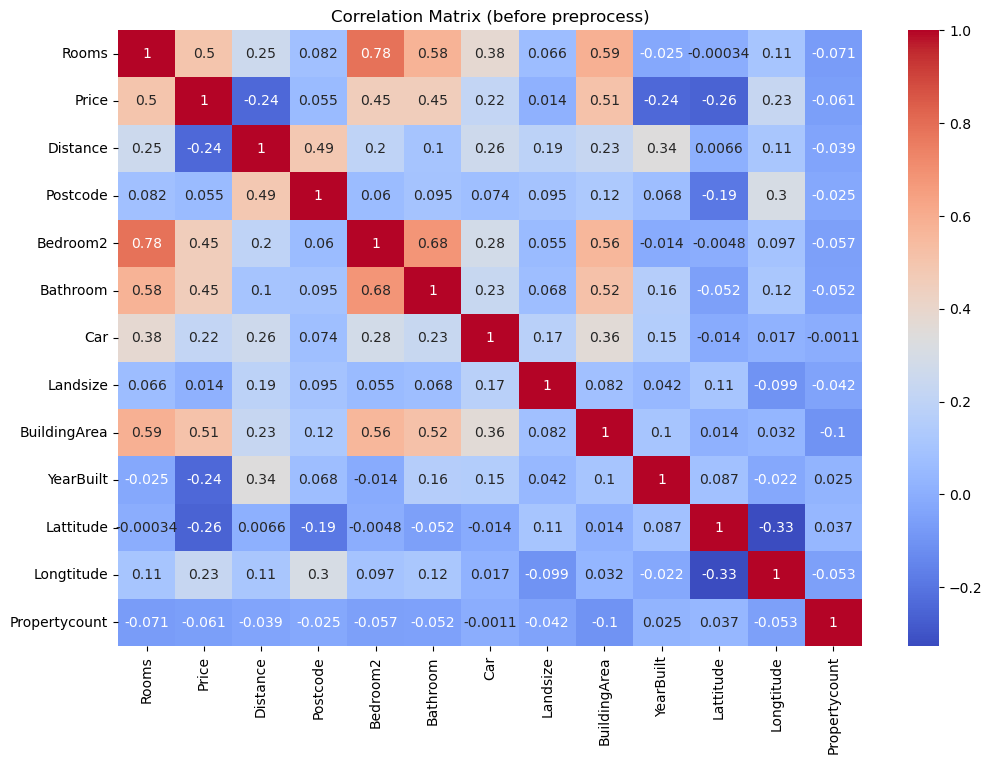

In [17]:
# korelasyon matrisi (before preprocess)
plt.figure(figsize=(12, 8))
sns.heatmap(unpreprocessed_sample[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (before preprocess)")
plt.show()

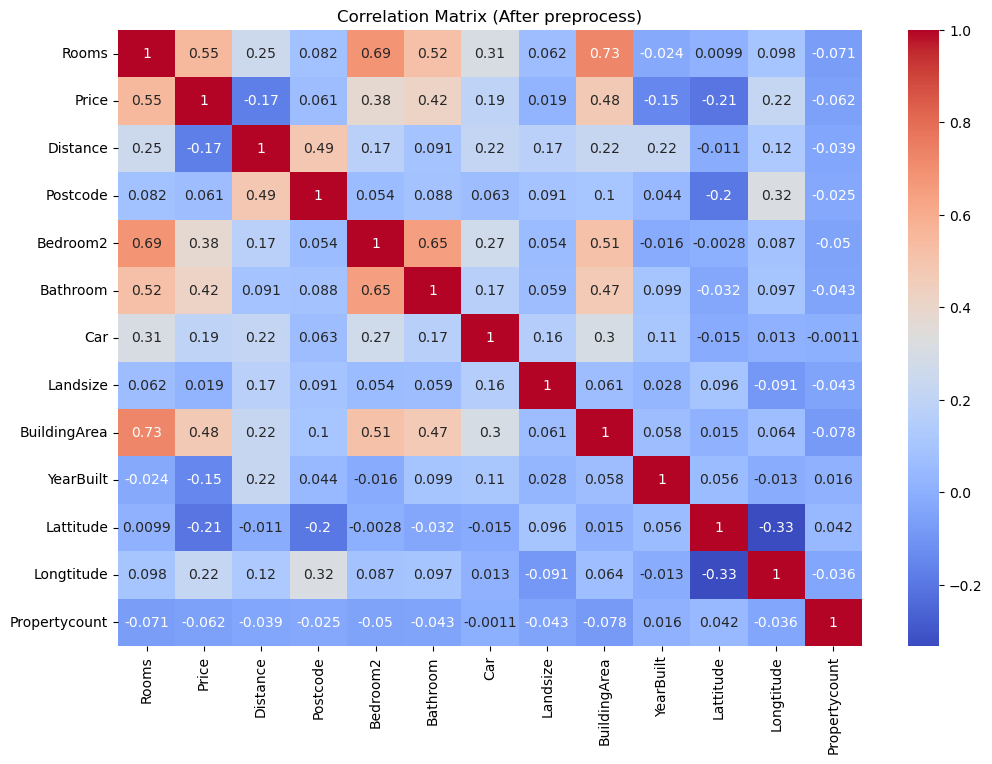

In [18]:
# korelasyon matrisi (after preprocess)
plt.figure(figsize=(12, 8))
sns.heatmap(sample_df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (After preprocess)")
plt.show()

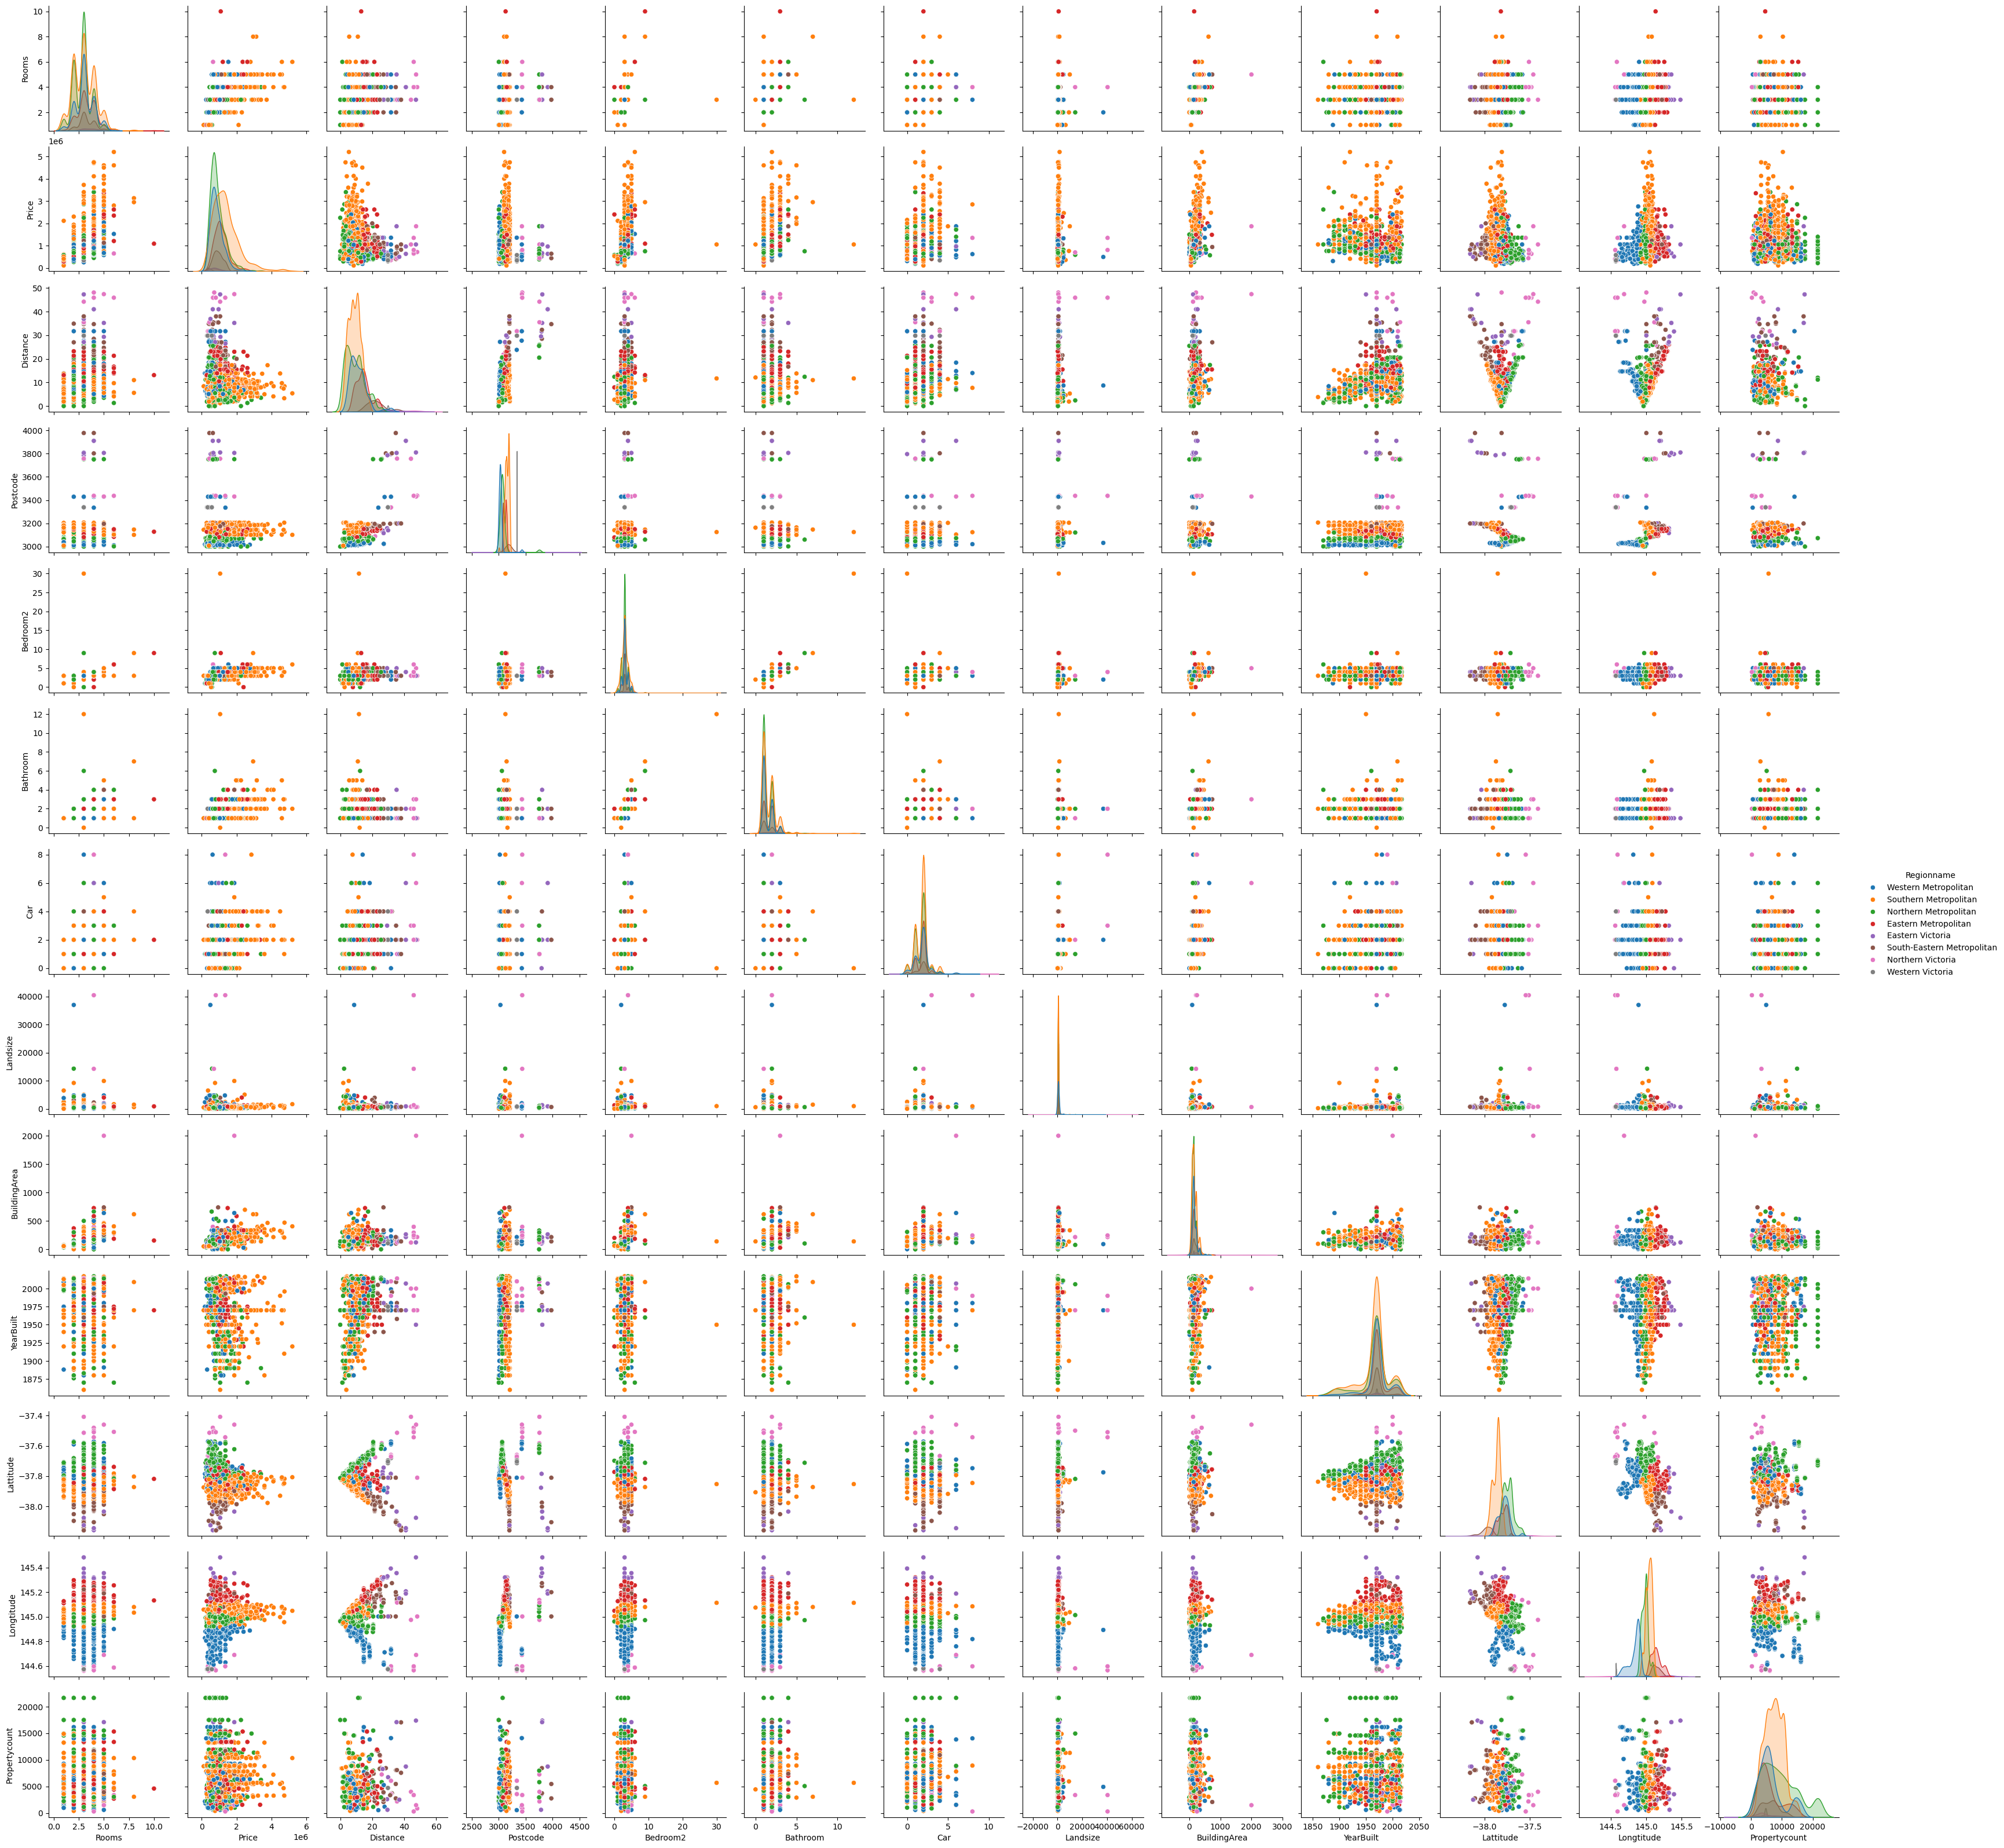

In [19]:
# numerik değerlerin birbirleriyle kıyaslaması
sns.pairplot(sample_df, hue="Regionname", vars=numeric_cols)
plt.show()